# TASK : Perform ‘Exploratory Data Analysis’ on 'Bank' dataset

### Problem Statement

To understand the driving factors (or driver variables) behind loan default which can be utilised by the client for its portfolio and risk assessment, by exploratory data analysis

### Approach


Perform ‘Exploratory Data Analysis’ on 'Bank' dataset

## Step 1: Importing the required Library

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Preparation - Current Application Dataset

### 2.1 Data Loading

In [2]:
# Set the prerequisite property to display all the columns and rows in dataset
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

# Read 'application_data.csv' file
application =pd.read_csv('application_data.csv')
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### 2.2 Data Inspection

In [3]:
# As the Number of column are too high, set addtional parameter to display complete info
application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [4]:
application.shape

(307511, 122)

In [5]:
application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Let’s view the unique values of each column to help us understand the dataset better.

In [7]:
for col in application:
    print("{} : {}  \n".format(col,application[col].unique()))

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]  

TARGET : [1 0]  

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']  

CODE_GENDER : ['M' 'F' 'XNA']  

FLAG_OWN_CAR : ['N' 'Y']  

FLAG_OWN_REALTY : ['Y' 'N']  

CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]  

AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]  

AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]  

AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]  

AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]  

NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']  

NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']  

NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academi


APARTMENTS_AVG : [0.0247 0.0959    nan ... 0.0261 0.0731 0.3466]  

BASEMENTAREA_AVG : [0.0369 0.0529    nan ... 0.274  0.2733 0.636 ]  

YEARS_BEGINEXPLUATATION_AVG : [0.9722 0.9851    nan 0.9811 0.9806 0.9985 0.9881 0.9781 0.9786 0.9876
 0.9861 0.9732 0.9831 0.9697 0.9901 0.9801 0.9762 0.996  0.998  0.9846
 0.9886 0.9354 0.9841 0.9856 0.9955 0.9677 0.9891 0.9752 0.9826 0.9727
 0.6508 0.9578 0.9742 0.9707 0.9975 0.999  0.9816 0.9866 0.9836 0.994
 0.9757 0.9737 0.9791 0.9821 0.9682 0.995  0.9771 0.9945 0.9747 0.9776
 0.9796 0.9896 0.9692 0.9518 0.9995 0.9414 0.993  0.9702 0.9921 0.9916
 0.9712 0.4933 0.9871 0.9672 0.9911 0.9608 0.9906 0.9503 0.9598 0.997
 0.9583 0.9767 0.929  0.9935 0.9617 0.9563 0.9965 0.9925 0.9508 0.9717
 0.9687 0.9667 0.9359 0.9573 0.9588 0.9513 0.9642 0.9553 0.9603 0.9543
 0.9622 0.9637 0.3224 0.9568 0.6538 0.9652 0.9523 0.4953 0.9473 0.
 0.9071 0.9593 0.9627 0.9613 0.9439 0.9434 0.9488 0.4973 0.9459 0.9334
 0.9657 0.9632 0.9424 0.9548 0.9449 0.4913 0.9647 0.9662


LANDAREA_AVG : [0.0369 0.013     nan ... 0.4394 0.2662 0.313 ]  

LIVINGAPARTMENTS_AVG : [0.0202 0.0773    nan ... 0.2334 0.0111 0.1543]  

LIVINGAREA_AVG : [0.019  0.0549    nan ... 0.4256 0.6005 0.9279]  

NONLIVINGAPARTMENTS_AVG : [0.000e+00 3.900e-03       nan 1.930e-02 7.700e-03 1.900e-03 6.560e-02
 5.800e-03 2.780e-01 2.320e-02 7.720e-02 1.931e-01 3.860e-02 1.540e-02
 2.201e-01 1.160e-02 2.700e-02 1.622e-01 3.090e-02 4.250e-02 6.180e-02
 5.020e-02 1.740e-02 2.900e-02 2.100e-03 1.300e-03 6.900e-03 1.350e-02
 4.100e-03 1.500e-03 1.274e-01 5.790e-02 2.625e-01 8.000e-04 1.969e-01
 4.830e-02 4.630e-02 4.440e-02 1.030e-02 5.660e-02 2.830e-02 1.158e-01
 3.470e-02 8.110e-02 7.340e-02 7.452e-01 1.236e-01 2.500e-03 1.506e-01
 1.000e+00 6.400e-03 9.270e-02 4.890e-02 1.100e-03 1.429e-01 8.690e-02
 1.400e-03 5.410e-02 2.080e-02 1.410e-02 2.278e-01 7.000e-04 1.000e-03
 6.950e-02 2.200e-03 8.880e-02 2.220e-02 2.900e-03 1.000e-02 1.197e-01
 1.029e-01 9.700e-03 2.046e-01 1.081e-01 1.390e-01 2.31


ELEVATORS_MODE : [0.     0.0806    nan 0.1611 0.4028 0.1208 0.282  0.0403 0.2417 0.8862
 0.3222 0.3625 0.6848 0.5639 0.6042 0.2014 0.5236 0.4431 0.4834 0.6445
 0.725  1.     0.8459 0.9667 0.8056 0.9264 0.7653]  

ENTRANCES_MODE : [0.069  0.0345    nan 0.2069 0.1379 0.1724 0.1034 0.3103 0.4828 0.3793
 0.3448 0.2759 0.2414 0.4483 0.5172 0.     0.5517 0.4138 0.6207 0.6897
 0.6552 0.5862 0.7931 0.8276 0.7586 0.8621 0.7241 1.     0.8966 0.9655
 0.931 ]  

FLOORSMAX_MODE : [0.0833 0.2917    nan 0.1667 0.3333 0.6667 0.375  0.0417 0.25   0.4583
 0.2083 0.125  0.     0.5833 0.625  0.9167 0.9583 0.5417 1.     0.4167
 0.875  0.7083 0.75   0.5    0.7917 0.8333]  

FLOORSMIN_MODE : [0.125  0.3333    nan 0.375  0.7083 0.0417 0.2083 0.4167 0.2917 0.
 0.5    0.625  0.0833 0.1667 0.6667 0.25   0.5833 1.     0.9583 0.5417
 0.9167 0.75   0.8333 0.4583 0.7917 0.875 ]  

LANDAREA_MODE : [0.0377 0.0128    nan ... 0.2958 0.4494 0.2723]  

LIVINGAPARTMENTS_MODE : [2.200e-02 7.900e-02       nan 1.313e-01 3.11


BASEMENTAREA_MEDI : [0.0369 0.0529    nan ... 0.3482 0.274  0.2733]  

YEARS_BEGINEXPLUATATION_MEDI : [0.9722 0.9851    nan 0.9811 0.9806 0.9985 0.9881 0.9781 0.9786 0.9876
 0.9861 0.9732 0.9831 0.9697 0.9901 0.9801 0.9762 0.996  0.998  0.9846
 0.9886 0.9136 0.9841 0.9856 0.9955 0.9677 0.9891 0.9752 0.9826 0.9727
 0.9578 0.9742 0.9707 0.9975 0.999  0.9816 0.9866 0.9836 0.994  0.9757
 0.9737 0.9791 0.9821 0.9682 0.9945 0.9771 0.9747 0.9776 0.9796 0.9896
 0.9692 0.9518 0.995  0.9995 0.9414 0.993  0.9702 0.9921 0.9916 0.9712
 0.4933 0.9871 0.9672 0.9911 0.9608 0.9906 0.9503 0.9598 0.997  0.9583
 0.9767 0.929  0.9935 0.9617 0.9563 0.9965 0.9925 0.9508 0.9717 0.9687
 0.9667 0.9359 0.9573 0.9588 0.9513 0.9642 0.9553 0.9603 0.9622 0.9637
 0.     0.9568 0.9652 0.9523 0.4953 0.9473 0.9071 0.9593 0.9627 0.9613
 0.9439 0.9434 0.9488 0.4973 0.9459 0.9334 0.9657 0.9632 0.9424 0.9548
 0.9449 0.4913 0.9647 0.9662 0.9468 0.9001 0.9324 0.9389 1.     0.9493
 0.9463 0.9498 0.92   0.4903 0.9121 0.9444 0.


FLAG_DOCUMENT_21 : [0 1]  

AMT_REQ_CREDIT_BUREAU_HOUR : [ 0. nan  1.  2.  3.  4.]  

AMT_REQ_CREDIT_BUREAU_DAY : [ 0. nan  1.  3.  2.  4.  5.  6.  9.  8.]  

AMT_REQ_CREDIT_BUREAU_WEEK : [ 0. nan  1.  3.  2.  4.  5.  6.  8.  7.]  

AMT_REQ_CREDIT_BUREAU_MON : [ 0. nan  1.  2.  6.  5.  3.  7.  9.  4. 11.  8. 16. 12. 14. 10. 13. 17.
 24. 19. 15. 23. 18. 27. 22.]  

AMT_REQ_CREDIT_BUREAU_QRT : [  0.  nan   1.   2.   4.   3.   8.   5.   6.   7. 261.  19.]  

AMT_REQ_CREDIT_BUREAU_YEAR : [ 1.  0. nan  2.  4.  5.  3.  8.  6.  9.  7. 10. 11. 13. 16. 12. 25. 23.
 15. 14. 22. 17. 19. 18. 21. 20.]  



It’s imperative to know the count of NaN values for each column before we proceed further.

In [8]:
# Display null count for each column
application.isna().sum().sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

## Step 3: Data Cleaning

In [9]:
# Check the NA values
application.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [10]:
# The columns where the number of missing values is > 50 % can be ignored/deleted.
# We will retain the rest columns.
valid_columns=list(application.columns[application.isna().sum()< (len(application)/2) ])

# Update the application dataframe to contain only the columns with sufficient data.
application = application[valid_columns]
application.shape

(307511, 81)

In [11]:
# Get the percentage of Nulls in each columns before we start the cleaning process
application_missing = (1 - application.count() / len(application))*100
application_missing.sort_values(ascending=False).head(25)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [12]:
# Approximately 50% of the data is missing for these columns, thus we will have to drop them.
application=application.drop(['FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_AVG',
                             'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE',
                             'EMERGENCYSTATE_MODE'], axis=1)

In [13]:
# Get the percentage of Nulls in each columns before we start the cleaning process
application_missing = (1 - application.count() / len(application))*100
application_missing.sort_values(ascending=False).head(25)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
TARGET                         0.000000
FLAG_EMAIL                     0.000000
FLAG_PHONE                     0.000000
FLAG_CONT_MOBILE               0.000000
NAME_CONTRACT_TYPE             0.000000


In [14]:
application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
# Since OCCUPATION_TYPE can be a driving factor for an applicant's income, and it has significant amount of missing values, we are binning it as 'Unknown'
application.OCCUPATION_TYPE.fillna('Unknown', inplace=True)

In [16]:
# Crosscheck after inputation
application.OCCUPATION_TYPE.isna().sum()

0

In [17]:
# Define the function for visulizing the frequency
def plot_frequency(df, column):
    sns.distplot(df[column])
    plt.show()

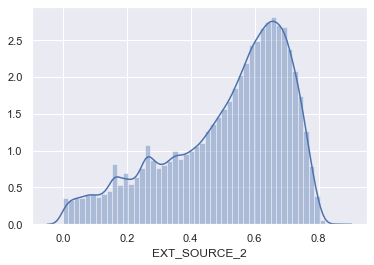

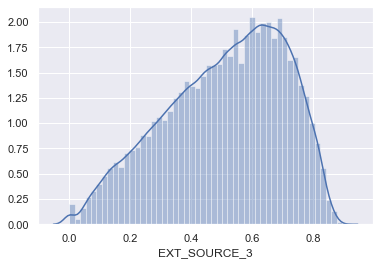

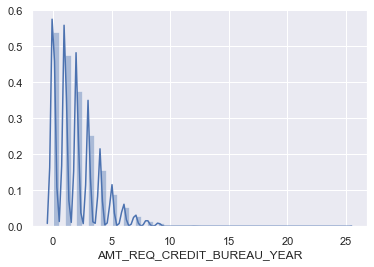

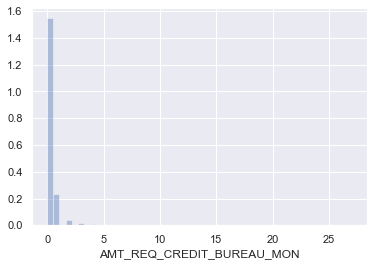

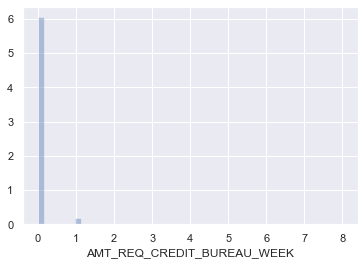

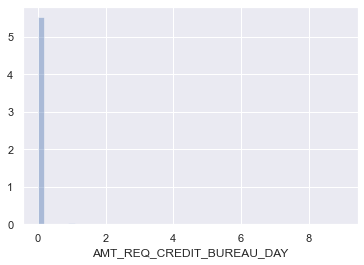

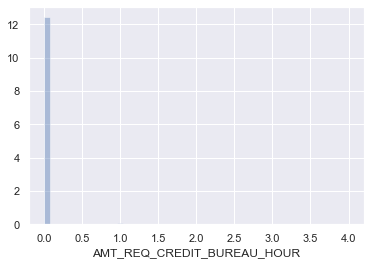

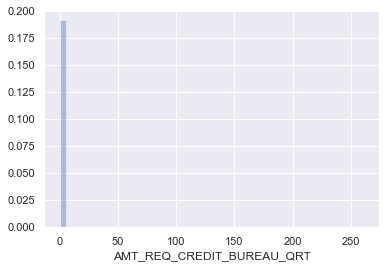

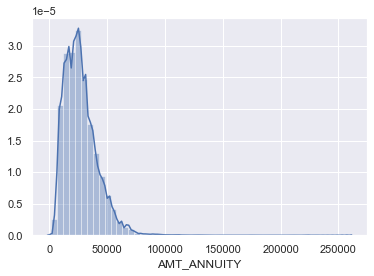

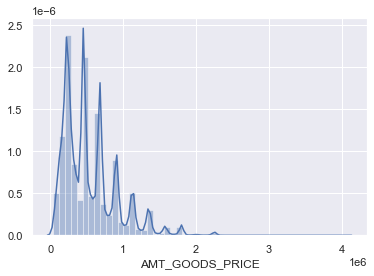

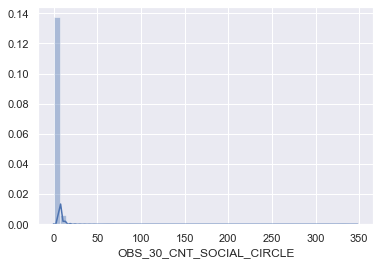

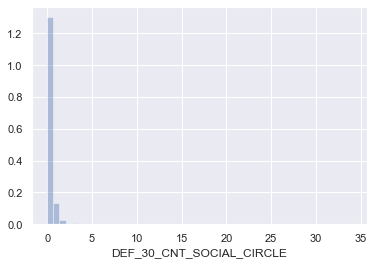

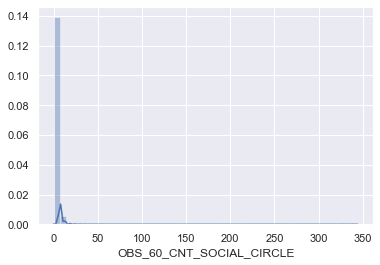

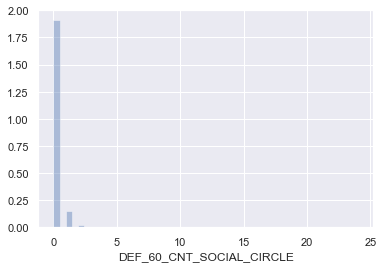

In [18]:
for column in ['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'
               ,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
               'DEF_60_CNT_SOCIAL_CIRCLE']:
    plot_frequency(application,column)

In [19]:
# As per the distplot, EXT_SOURCE_2 and EXT_SOURCE_3 has a normal distribution, thus filling the missing values with mean, 
# the remaining have a skewed distribution thus filling missing values with Median

application['EXT_SOURCE_2'].fillna(application.EXT_SOURCE_3.mean(),inplace=True)
application['EXT_SOURCE_3'].fillna(application.EXT_SOURCE_3.mean(),inplace=True)

application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace=True)
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)
application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['AMT_ANNUITY'].fillna(application.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)
application['AMT_GOODS_PRICE'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)
application['CNT_FAM_MEMBERS'].fillna(application.CNT_FAM_MEMBERS.median(),inplace=True)
application['DAYS_LAST_PHONE_CHANGE'].fillna(application.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)


In [20]:
# Cross check after inputation
application[['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'
               ,'AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE',
                'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
            ]].isna().sum()

EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
dtype: int64

In [21]:
application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
# As the number of null values in 'NAME_TYPE_SUITE' coulumn are less and it is catgorical field. So imputating the null value with mode
application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [23]:
application['NAME_TYPE_SUITE'].isnull().sum()

0

In [24]:
# Verify the unknow values percentage
application.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [25]:
# Imputed unknown values with mode
application.CODE_GENDER.replace('XNA',application.CODE_GENDER.mode()[0],inplace=True)

In [26]:
# Cross Check after inputation
application.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [27]:
application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Step 4: Data Standardization

In [28]:
# Add a new column which contain addition of all the flags document column, this is done to represent data in concise way
application['FLAG_DOCUMENT_TOTAL']=application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].sum(axis=1)

In [29]:
application.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
284247      429185       0         Cash loans           F            N   
262080      403363       0         Cash loans           M            N   
125528      245563       0         Cash loans           F            Y   
28423       133035       0         Cash loans           F            Y   
118563      237489       0    Revolving loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
284247               Y             2           85500.0    254700.0   
262080               N             1          135000.0   1024740.0   
125528               Y             0          112500.0    728460.0   
28423                Y             1          103500.0    526491.0   
118563               Y             0          112500.0    135000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
284247      17149.5         225000.0   Unaccompanied          Working   
262080      52452.0         900000.0          Family          Working   
125528      38808.0         675000.0   Unaccompanied        Pensioner   
28423       29529.0         454500.0   Unaccompanied          Working   
118563       6750.0         135000.0          Family          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
284247  Secondary / secondary special            Married  House / apartment   
262080  Secondary / secondary special            Married  House / apartment   
125528  Secondary / secondary special            Married  House / apartment   
28423                Higher education            Married  House / apartment   
118563  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
284247                    0.020246      -14219           -810   
262080                    0.008474      -18574          -3796   
125528                    0.018850      -21647         365243   
28423                     0.035792      -15413          -7377   
118563                    0.018850      -18436          -1051   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
284247            -6532.0            -4581           1               1   
262080           -11190.0            -1869           1               1   
125528            -4204.0            -2364           1               0   
28423             -1170.0            -1783           1               1   
118563            -8525.0            -1902           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
284247                1                 1           0           0   
262080                0                 1           0           0   
125528                0                 1           1           0   
28423                 0                 1           0           0   
118563                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
284247        Laborers              4.0                     3   
262080        Laborers              3.0                     2   
125528         Unknown              2.0                     2   
28423       Core staff              3.0                     2   
118563     Sales staff              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
284247                            3                     FRIDAY   
262080                            2                  WEDNESDAY   
125528                            2                    TUESDAY   
28423                             2                  WEDNESDAY   
118563                            2                     MONDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
284247                        8                           0   
262080                       10                           0   


In [30]:
# Remove the individual document flag
cols=application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
application=application.drop(cols,axis=1)

In [31]:
len(application.columns)

54

In [32]:
# Verify that is any record present where DAYS_EMPLOYED is greater than DAYS_BIRTH
application[application.DAYS_EMPLOYED>=application.DAYS_BIRTH].sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
6740        107866       1         Cash loans           M            Y   
262047      403325       0         Cash loans           M            N   
79038       191615       0         Cash loans           F            Y   
290545      436605       0         Cash loans           M            N   
287384      432887       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
6740                 Y             0           90000.0    521280.0   
262047               Y             0          135000.0    112500.0   
79038                N             0          112500.0    175896.0   
290545               N             0          117000.0    313438.5   
287384               N             1          135000.0    270000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
6740        35392.5         450000.0   Unaccompanied          Working   
262047      11088.0         112500.0   Unaccompanied        Pensioner   
79038        7875.0         126000.0   Unaccompanied    State servant   
290545      29133.0         283500.0   Unaccompanied          Working   
287384      13500.0         270000.0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
6740    Secondary / secondary special     Civil marriage  House / apartment   
262047               Higher education            Married  House / apartment   
79038   Secondary / secondary special     Civil marriage  House / apartment   
290545  Secondary / secondary special            Married  House / apartment   
287384               Higher education     Civil marriage       With parents   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
6740                      0.022625      -11964          -1145   
262047                    0.025164      -24842         365243   
79038                     0.015221      -16122          -4339   
290545                    0.018634      -18690          -6611   
287384                    0.018634      -19367          -1639   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
6740             -11964.0             -523           1               1   
262047            -2341.0            -4789           1               0   
79038             -8287.0            -4021           1               1   
290545            -9707.0            -2237           1               1   
287384            -3927.0            -2100           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
6740                  1                 1           0           0   
262047                0                 1           0           0   
79038                 0                 1           1           0   
290545                0                 1           0           0   
287384                0                 1           0           0   

              OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
6740                 Laborers              2.0                     2   
262047                Unknown              2.0                     2   
79038                 Unknown              2.0                     2   
290545                Drivers              2.0                     2   
287384  High skill tech staff              3.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
6740                              2                     MONDAY   
262047                            2                   THURSDAY   
79038                             2                   THURSDAY   
290545                            2                     FRIDAY   
287384                            2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
6740                         15                           0   
262047               

###  Data Quality Check 

Check whether DAYS_EMPLOYED is greater than DAYS_BIRTH

In [33]:
len(application[abs(application.DAYS_EMPLOYED) > abs(application.DAYS_BIRTH)])

55374

In [34]:
# Find the record where DAYS_EMPLOYED is greater than 0
print(application[application.DAYS_EMPLOYED>0].DAYS_EMPLOYED.sample(5))

111253    365243
79027     365243
289877    365243
299427    365243
186172    365243
Name: DAYS_EMPLOYED, dtype: int64


In [35]:
error_record_count=list(application[application.DAYS_EMPLOYED>0].DAYS_EMPLOYED.value_counts())
print("Number of records where DAYS_EMPLOYED greater DAYS_BIRTH:\n  Record Count: {} ".format(error_record_count[0]))

Number of records where DAYS_EMPLOYED greater DAYS_BIRTH:
  Record Count: 55374 


#### Check whether AMT_INCOME_TOTAL is less than 0

In [36]:
len(application[application.AMT_INCOME_TOTAL<0])

0

## Fixing Outlier

- #### Find oulier

In [37]:
# Define the function to detect the outlier
def hasVarOutliers(df):
    for var in df:
        if var != "SK_ID_CURR":
            if df[var].dtype != 'object':
                if len(list(df[var].unique())) > 10:
                    
                    Q1 = df[var].quantile(0.01)
                    Q3 = df[var].quantile(0.99)
                    IQR = Q3-Q1
                    lower = Q1- 1.5*IQR
                    upper = Q3 + 1.5*IQR
                    
                    if df[(df[var] > upper)].any(axis=None):
                        print(var,"----HAS OUTLIERS")
hasVarOutliers(application)

CNT_CHILDREN ----HAS OUTLIERS
AMT_INCOME_TOTAL ----HAS OUTLIERS
AMT_ANNUITY ----HAS OUTLIERS
CNT_FAM_MEMBERS ----HAS OUTLIERS
OBS_30_CNT_SOCIAL_CIRCLE ----HAS OUTLIERS
OBS_60_CNT_SOCIAL_CIRCLE ----HAS OUTLIERS
AMT_REQ_CREDIT_BUREAU_MON ----HAS OUTLIERS
AMT_REQ_CREDIT_BUREAU_QRT ----HAS OUTLIERS
AMT_REQ_CREDIT_BUREAU_YEAR ----HAS OUTLIERS


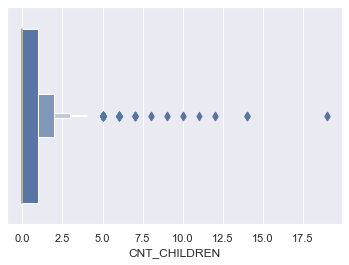

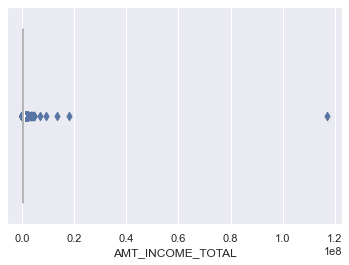

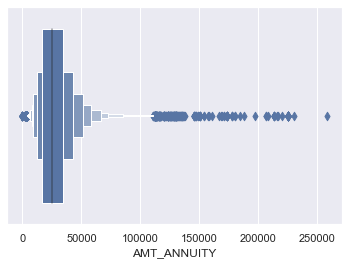

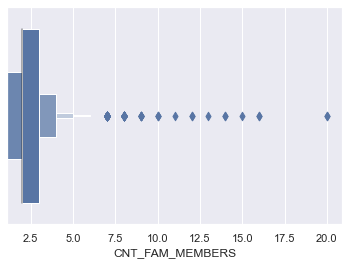

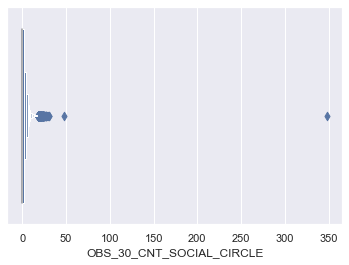

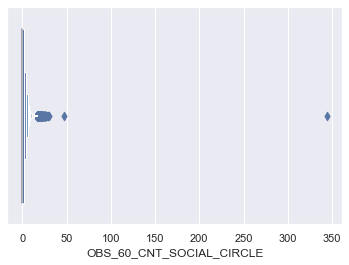

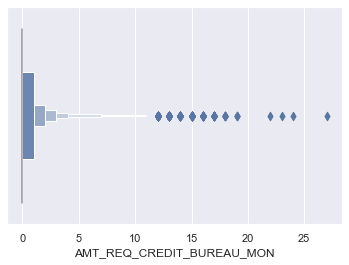

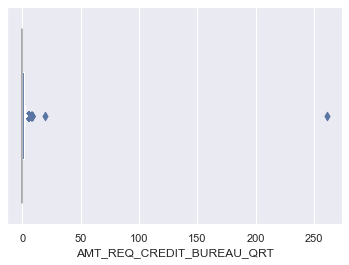

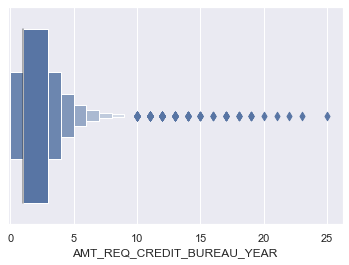

In [38]:
# Cross check the outliers by displaying the boxplot
for column in ['CNT_CHILDREN' ,'AMT_INCOME_TOTAL' ,'AMT_ANNUITY' ,'CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR' ]:
    sns.boxplot(application[column])
    plt.show()

- #### Fix Outlier

In [39]:
# Define the function to fill outlier
def fillOutliers(data):
    df = data.copy()
    for var in df:
        if var != "SK_ID_CURR":
            if df[var].dtype != 'object':
                if len(list(df[var].unique())) > 10:
                    
                    Q1 = df[var].quantile(0.01)
                    Q3 = df[var].quantile(0.99)
                    IQR = Q3-Q1
                    lower = Q1- 1.5*IQR
                    upper = Q3 + 1.5*IQR
                    
                    if df[(df[var] > upper)].any(axis=None):
                        maks = df[var].max()
                        minn = df[var].min()
                        
                        df[var][(df[var] > (upper))] = upper       
                        #df[var][(df[var] < (lower))] = lower 
                        print(var,"Differences Between Max and Upper:",str(maks-upper),"upper:",upper)
                        #print(var,"Differences Between Min and lower",str(minn-lower))
    return df 

In [40]:
application[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_ANNUITY','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
             'OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]=fillOutliers(
    application[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_ANNUITY','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
])

CNT_CHILDREN Differences Between Max and Upper: 11.5 upper: 7.5
AMT_INCOME_TOTAL Differences Between Max and Upper: 115886250.0 upper: 1113750.0
AMT_ANNUITY Differences Between Max and Upper: 92270.25 upper: 165755.25
CNT_FAM_MEMBERS Differences Between Max and Upper: 9.0 upper: 11.0
OBS_30_CNT_SOCIAL_CIRCLE Differences Between Max and Upper: 323.0 upper: 25.0
OBS_60_CNT_SOCIAL_CIRCLE Differences Between Max and Upper: 319.0 upper: 25.0
AMT_REQ_CREDIT_BUREAU_MON Differences Between Max and Upper: 17.0 upper: 10.0
AMT_REQ_CREDIT_BUREAU_QRT Differences Between Max and Upper: 256.0 upper: 5.0
AMT_REQ_CREDIT_BUREAU_YEAR Differences Between Max and Upper: 5.0 upper: 20.0


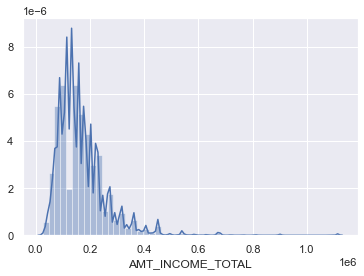

In [41]:
# Visualize the AMT_INCOME_TOTAL distribution after fixing the outlier
sns.distplot(application.AMT_INCOME_TOTAL)
plt.show()

- #### Add new column for Income Slab 

In [42]:
print(list(application.AMT_INCOME_TOTAL.sort_values().unique()))

[25650.0, 26100.0, 26460.0, 26550.0, 27000.0, 27585.0, 27900.0, 27967.5, 28161.0, 28350.0, 28404.0, 28575.0, 28593.0, 28723.5, 28800.0, 29133.0, 29250.0, 29583.0, 29700.0, 30150.0, 30600.0, 30915.0, 31050.0, 31500.0, 31531.5, 31815.0, 31860.0, 31950.0, 31990.5, 32040.0, 32139.0, 32211.0, 32220.0, 32400.0, 32625.0, 32634.0, 32692.5, 32850.0, 32967.0, 32994.0, 33165.0, 33214.5, 33300.0, 33750.0, 33885.0, 34042.5, 34052.715, 34200.0, 34650.0, 34785.0, 34852.5, 34875.0, 35046.0, 35100.0, 35482.5, 35550.0, 36000.0, 36180.0, 36382.5, 36436.5, 36450.0, 36607.5, 36652.5, 36679.5, 36828.0, 36900.0, 37008.0, 37273.5, 37350.0, 37710.0, 37800.0, 37854.0, 38025.0, 38250.0, 38419.155, 38457.0, 38700.0, 39087.0, 39150.0, 39307.5, 39339.0, 39600.0, 40050.0, 40149.0, 40203.0, 40230.0, 40275.0, 40306.5, 40500.0, 40707.0, 40738.5, 40950.0, 41004.0, 41130.0, 41148.0, 41211.0, 41314.5, 41332.5, 41400.0, 41485.5, 41850.0, 41940.0, 41989.5, 42300.0, 42367.5, 42390.0, 42750.0, 42867.0, 43011.0, 43020.0, 43200

In [43]:
application.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.679464e+05
std      9.350612e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.113750e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
# After analyzing the above data we have created the below cuts 
def add_income_slab(incomes):
    income_slab=[];
    for income in incomes:
        if (income > 200000.0):
            income_slab.append("Very High")
        elif((income>= 150000.0) and (income<200000.0)):
            income_slab.append("High")
        elif((income>=100000.0) and (income<150000.0)):
            income_slab.append("Medium")
        else:
            income_slab.append("Low")
    return income_slab


application['AMT_INCOME_SLAB']=add_income_slab(application['AMT_INCOME_TOTAL'])


- #### Add Credit income ratio column

In [45]:
# Find the Credit income ratio for risk assessing.
application['CREDIT_TO_INCOME_RATIO']=application.AMT_CREDIT/application.AMT_INCOME_TOTAL

In [46]:
application.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
154501      279071       1         Cash loans           F            Y   
160373      285911       0         Cash loans           F            N   
255253      395354       0         Cash loans           F            Y   
117623      236393       0         Cash loans           F            N   
84060       197503       0         Cash loans           F            N   
3343        103907       0         Cash loans           M            N   
277766      421813       0         Cash loans           F            N   
178551      306903       0         Cash loans           F            N   
211025      344552       0         Cash loans           F            Y   
82620       195817       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
154501               Y           0.0          139500.0    314100.0   
160373               Y           3.0          180000.0    273636.0   
255253               Y           1.0          225000.0   1543500.0   
117623               N           0.0           76500.0    900000.0   
84060                Y           0.0          180000.0    953460.0   
3343                 Y           2.0          225000.0    450000.0   
277766               N           1.0           90000.0    404325.0   
178551               Y           0.0          135000.0    398160.0   
211025               Y           0.0           85500.0    599116.5   
82620                Y           0.0           81000.0    445500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
154501      21375.0         225000.0   Unaccompanied               Working   
160373      21748.5         247500.0   Unaccompanied  Commercial associate   
255253      63828.0        1543500.0   Unaccompanied  Commercial associate   
117623      29875.5         900000.0   Unaccompanied             Pensioner   
84060       66487.5         900000.0   Unaccompanied         State servant   
3343        21888.0         450000.0   Unaccompanied               Working   
277766      20772.0         337500.0          Family  Commercial associate   
178551      17460.0         315000.0          Family  Commercial associate   
211025      25515.0         535500.0          Family               Working   
82620       20767.5         445500.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
154501  Secondary / secondary special               Married   
160373  Secondary / secondary special             Separated   
255253  Secondary / secondary special               Married   
117623  Secondary / secondary special               Married   
84060                Higher education               Married   
3343    Secondary / secondary special               Married   
277766  Secondary / secondary special        Civil marriage   
178551  Secondary / secondary special               Married   
211025               Higher education  Single / not married   
82620   Secondary / secondary special        Civil marriage   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
154501  House / apartment                    0.018634      -10231   
160373  House / apartment                    0.024610      -14518   
255253  House / apartment                    0.025164      -15824   
117623  House / apartment                    0.035792      -20587   
84060   House / apartment                    0.018801      -12526   
3343    House / apartment                    0.020246      -13514   
277766  House / apartment                    0.009630      -17531   
178551  House / apartment                    0.030755      -17173   
211025  House / apartment                    0.006852       -9119   
82620   House / apartment                    0.015221      -13137   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
154501           -290            -39

## Step 5: Data Visualization

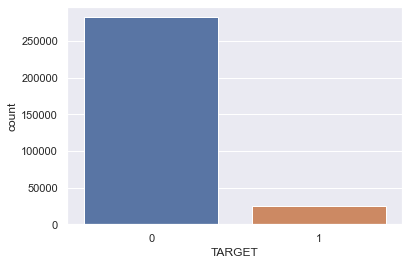

In [47]:
#Check the data distribution in for the target column.

application.head()
application['TARGET'].value_counts()
sns.countplot(application['TARGET'])
plt.show()

# The target Variable seems to be imbalanced,

In [48]:
# Ratio  for imbalance

(application['TARGET']==0).sum() / (application['TARGET']==1).sum()

11.387150050352467

In [49]:
# Since the data is imbalance we'will split the dataset, 
application_paymentDiff = application.loc[application['TARGET'] == 0]
application_paymentNoDiff = application.loc[application['TARGET'] == 1]

In [50]:
# Get the Categorical columns :
cat_col = list(set(application.columns) - set(application.describe().columns))
cat_col

['NAME_EDUCATION_TYPE',
 'AMT_INCOME_SLAB',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_REALTY']

In [51]:
# Get the Numerical columns :
num_col = list(set(application.describe().columns))
num_col

['DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_WORK_PHONE',
 'REG_REGION_NOT_LIVE_REGION',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'REG_REGION_NOT_WORK_REGION',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH',
 'CNT_FAM_MEMBERS',
 'DAYS_EMPLOYED',
 'FLAG_PHONE',
 'AMT_ANNUITY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REGION_RATING_CLIENT',
 'TARGET',
 'REG_CITY_NOT_LIVE_CITY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_INCOME_TOTAL',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_POPULATION_RELATIVE',
 'LIVE_REGION_NOT_WORK_REGION',
 'FLAG_EMP_PHONE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_EMAIL',
 'CREDIT_TO_INCOME_RATIO',
 'FLAG_CONT_MOBILE',
 'REG_CITY_NOT_WORK_CITY',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_TOTAL',
 'SK_ID_CURR',
 'FLAG_MOBIL',
 'CNT_CHILDREN

##  Univariate and Bivariate Analysis


The first graph gives the univariate analysis of the variable. The subsequent columns give a bivariate analysis of the column with respect to the Target field.


In [52]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)

    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')

    ax3 = plt.subplot(223)
    application.groupby(column)['TARGET'].mean().plot.barh(ax=ax3)
    plt.xticks(rotation=90)
    plt.title("Plotting the behaviour of defaulter(TARGET=1) across {} categories".format(column))
    

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

Plotting  NAME_EDUCATION_TYPE


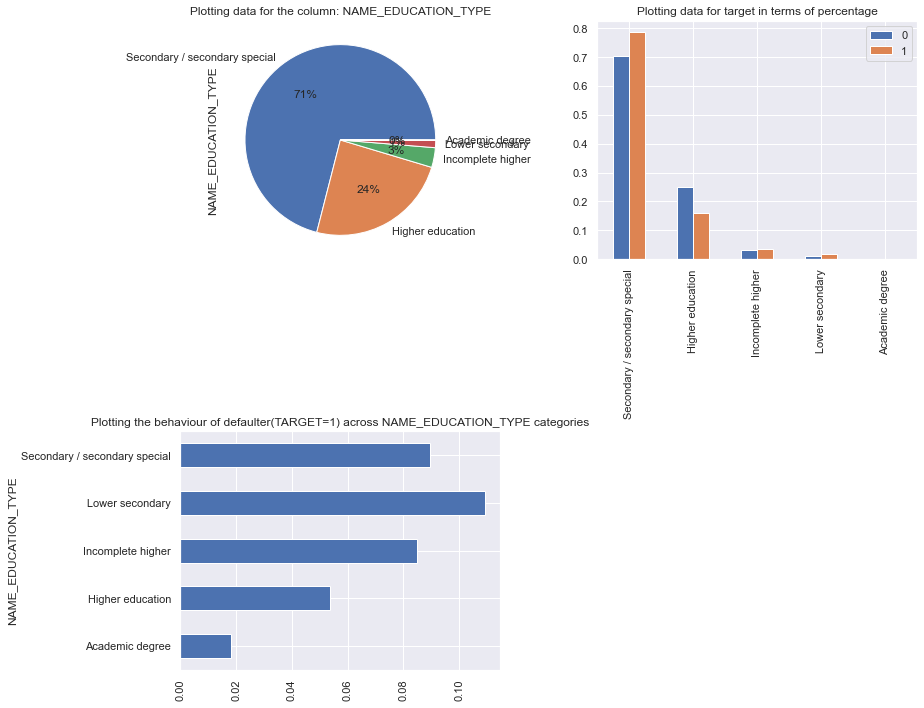

Plotting  AMT_INCOME_SLAB


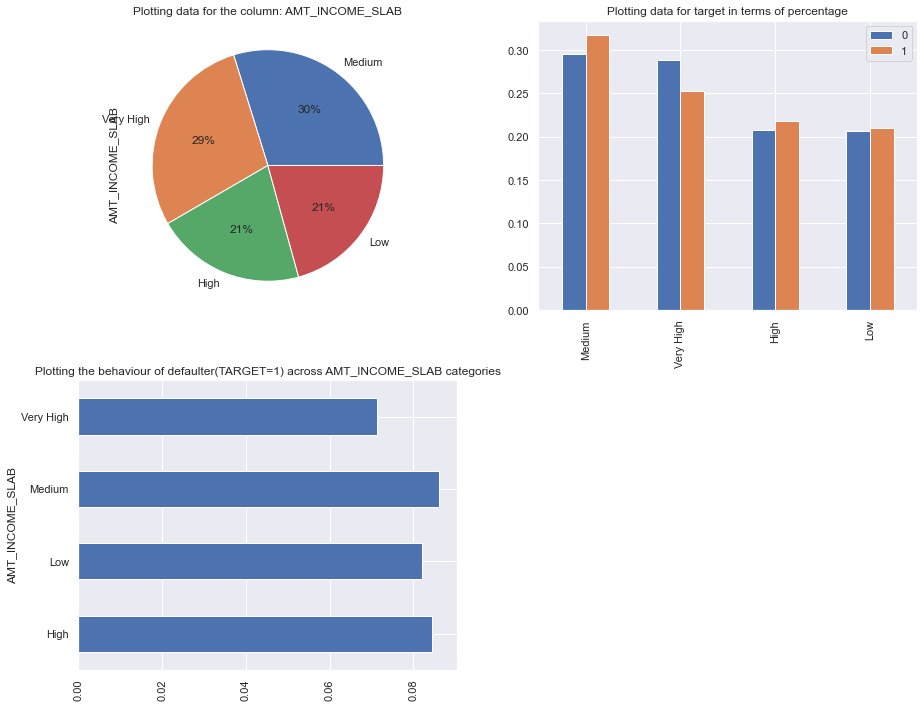

Plotting  FLAG_OWN_CAR


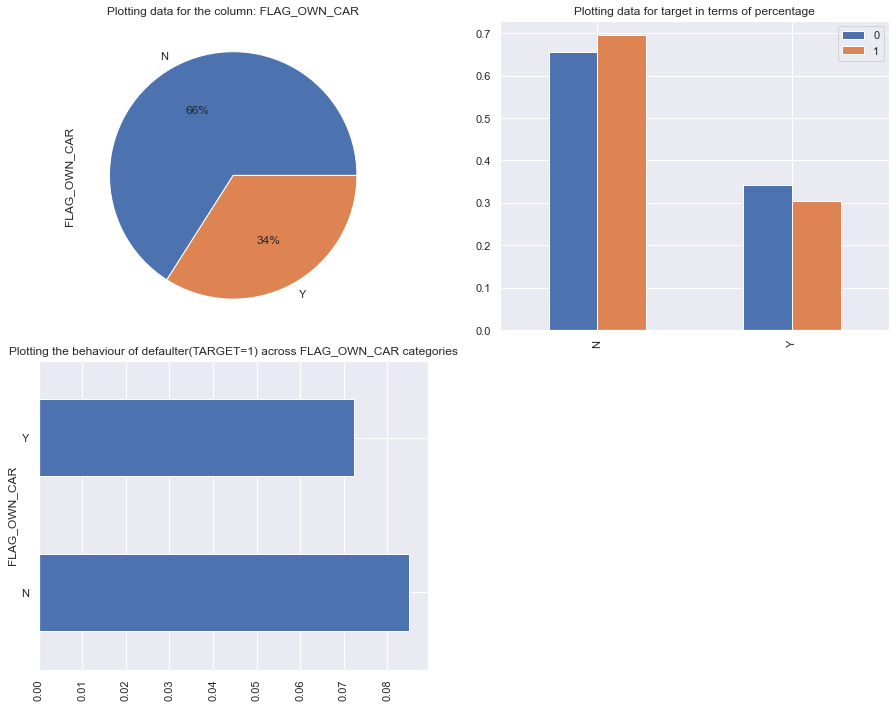

Plotting  CODE_GENDER


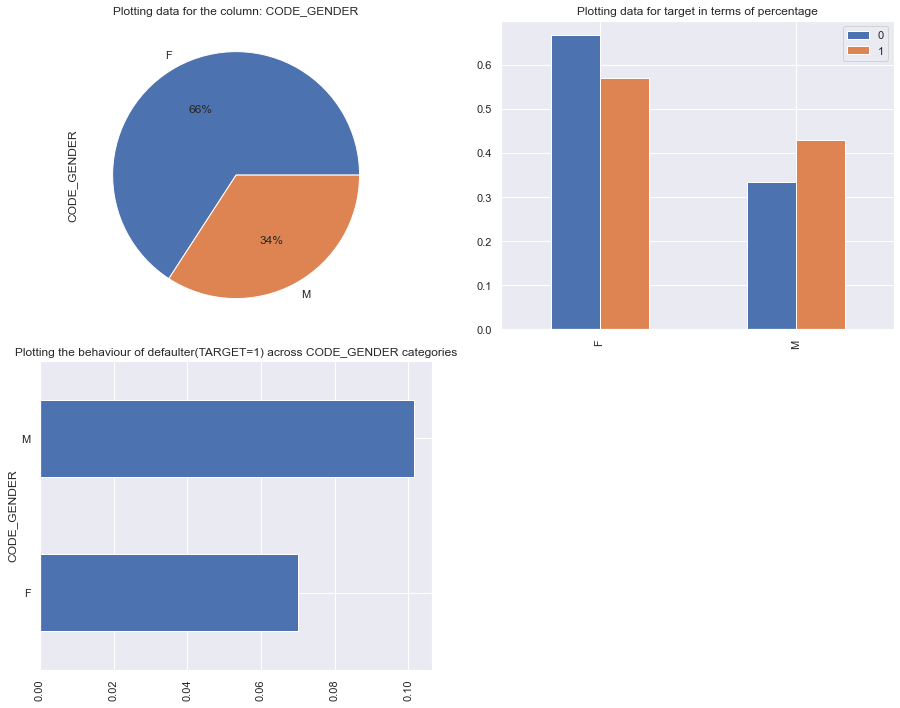

Plotting  WEEKDAY_APPR_PROCESS_START


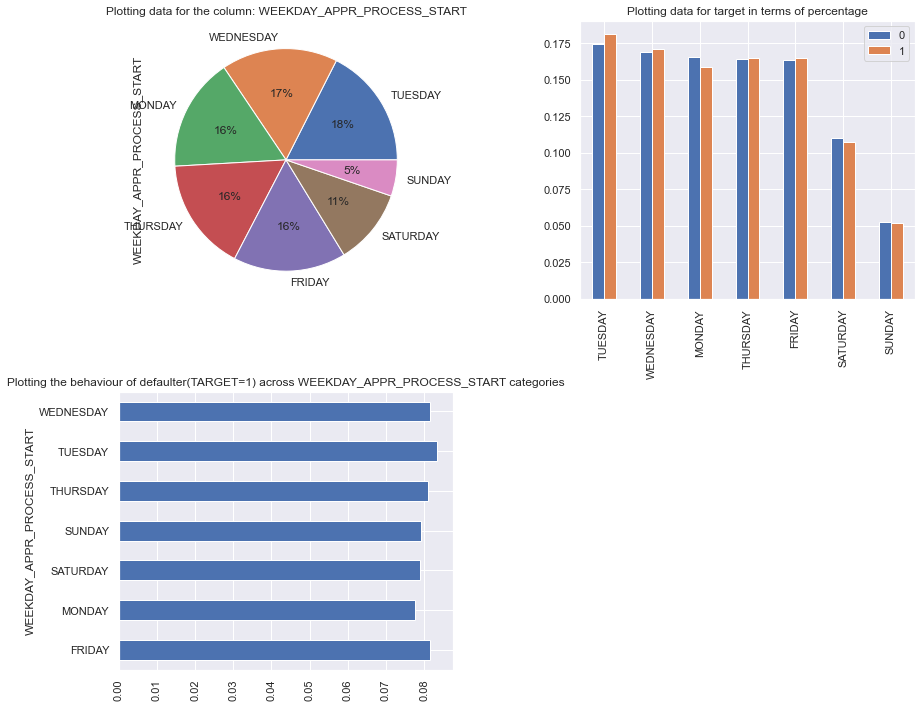

Plotting  NAME_CONTRACT_TYPE


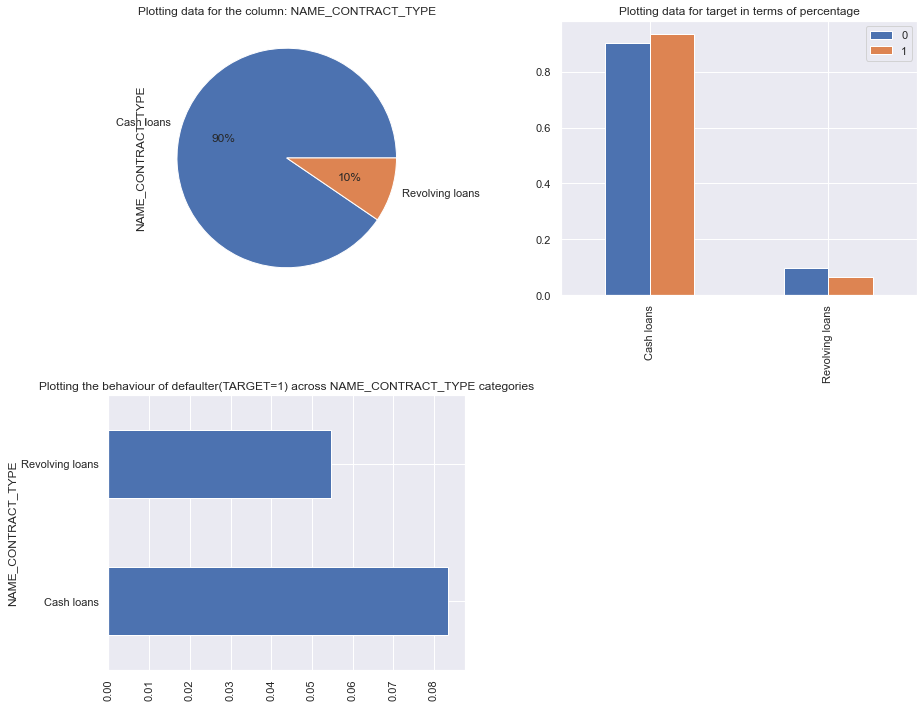

Plotting  NAME_HOUSING_TYPE


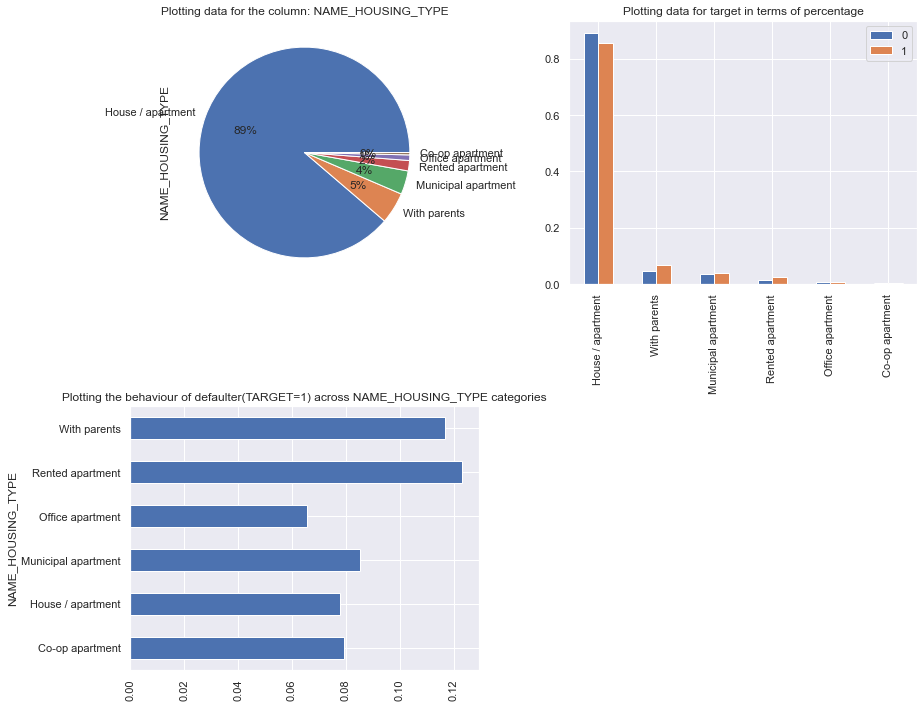

Plotting  NAME_FAMILY_STATUS


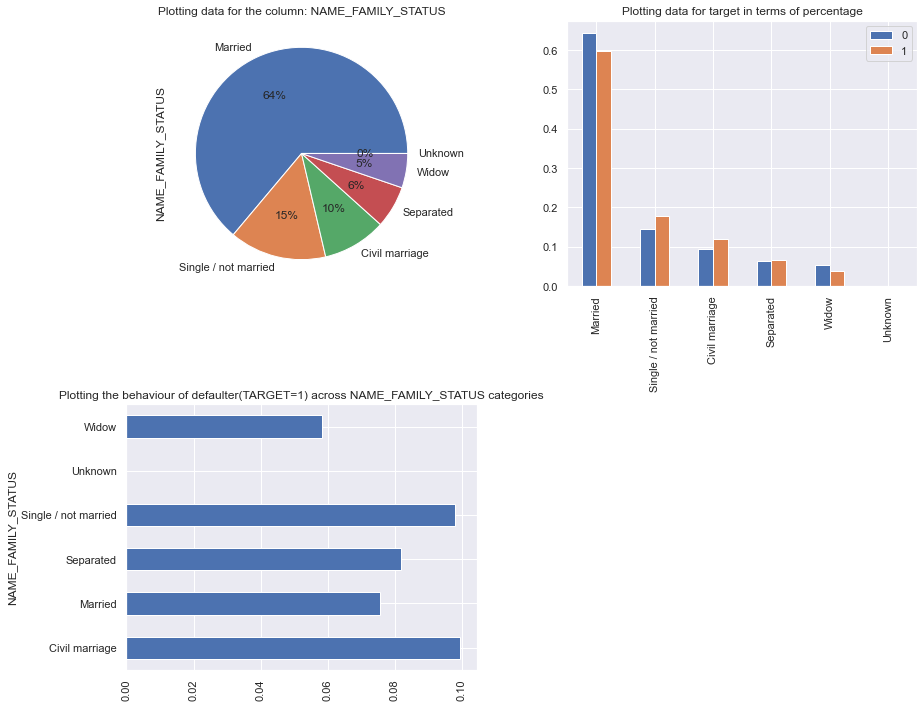

Plotting  OCCUPATION_TYPE


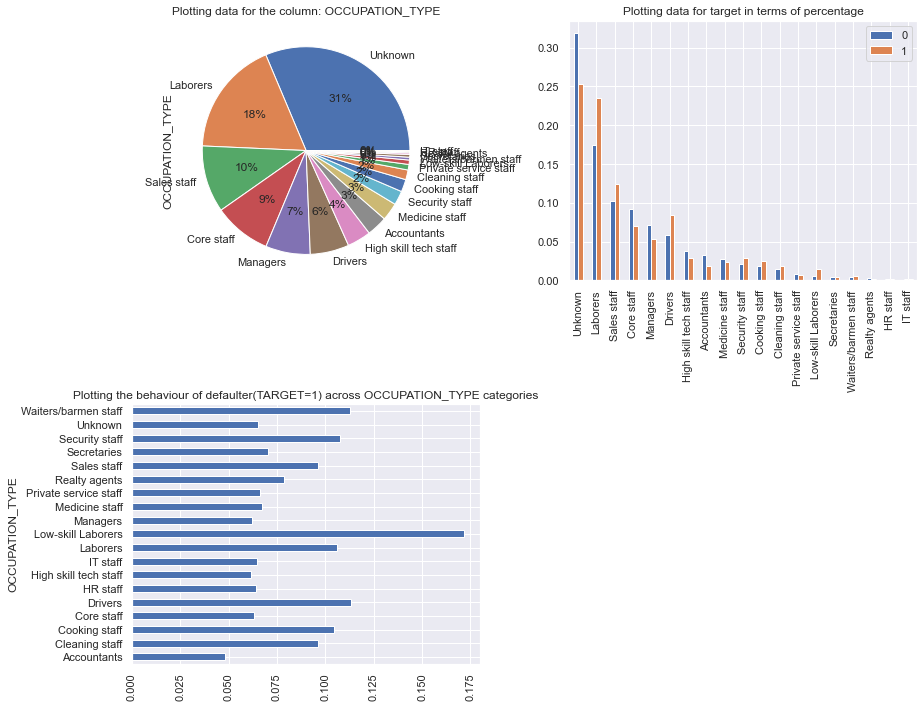

Plotting  NAME_INCOME_TYPE


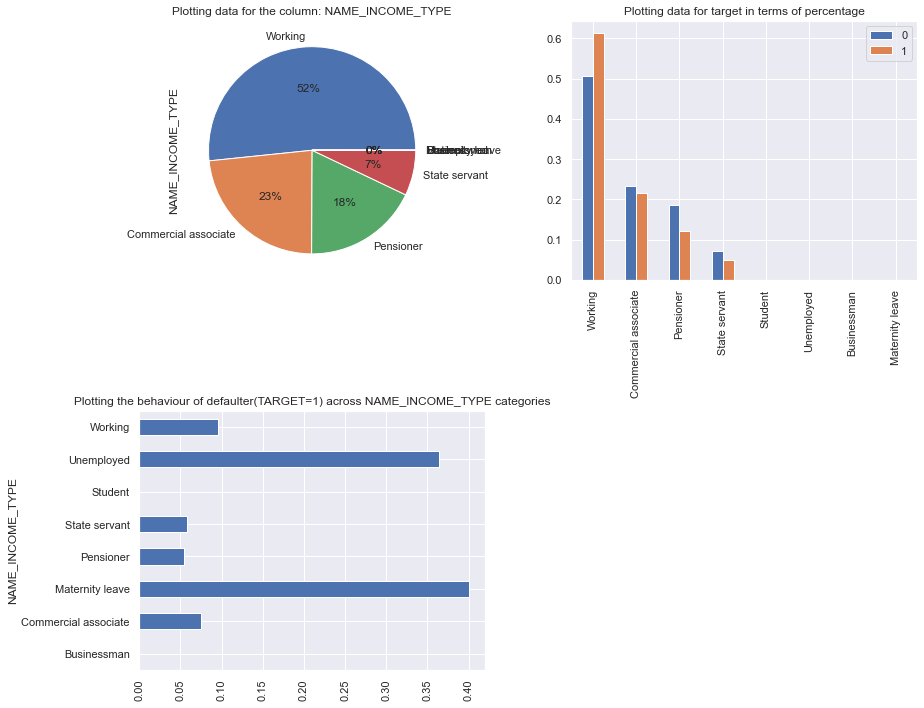

Plotting  ORGANIZATION_TYPE


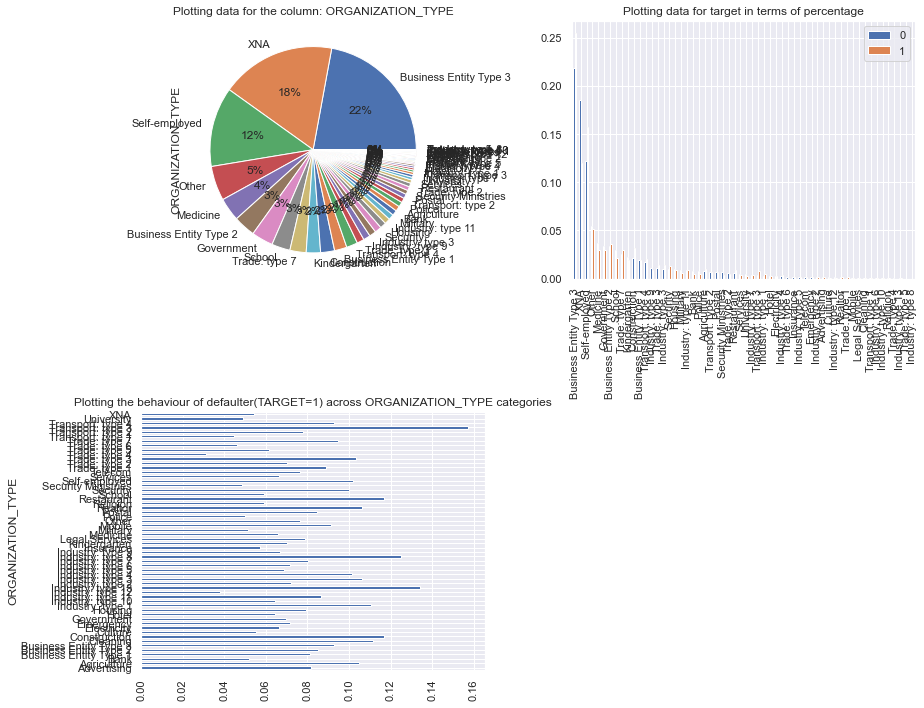

Plotting  NAME_TYPE_SUITE


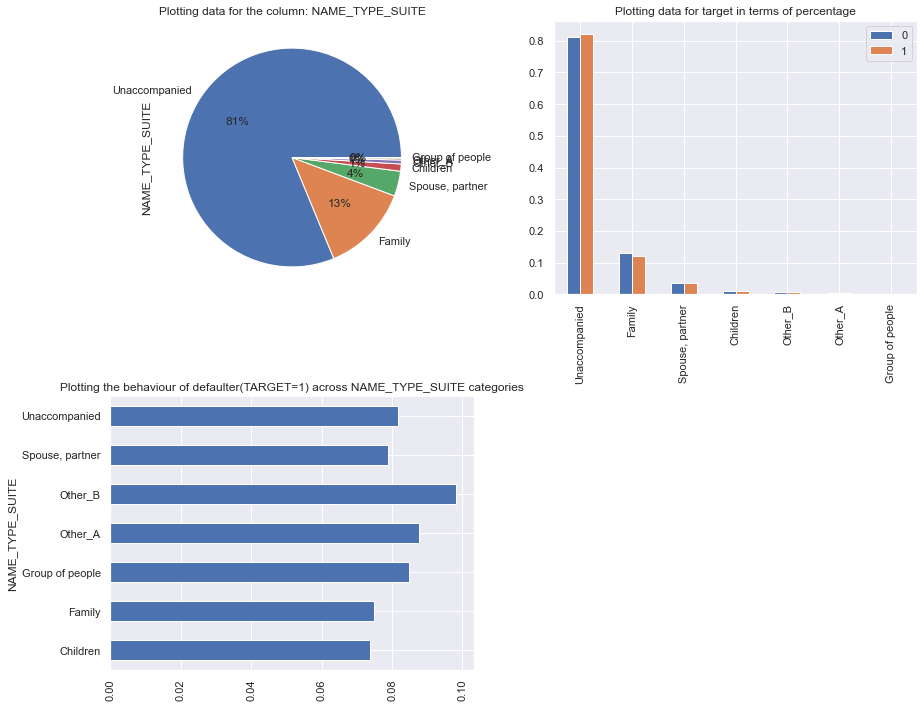

Plotting  FLAG_OWN_REALTY


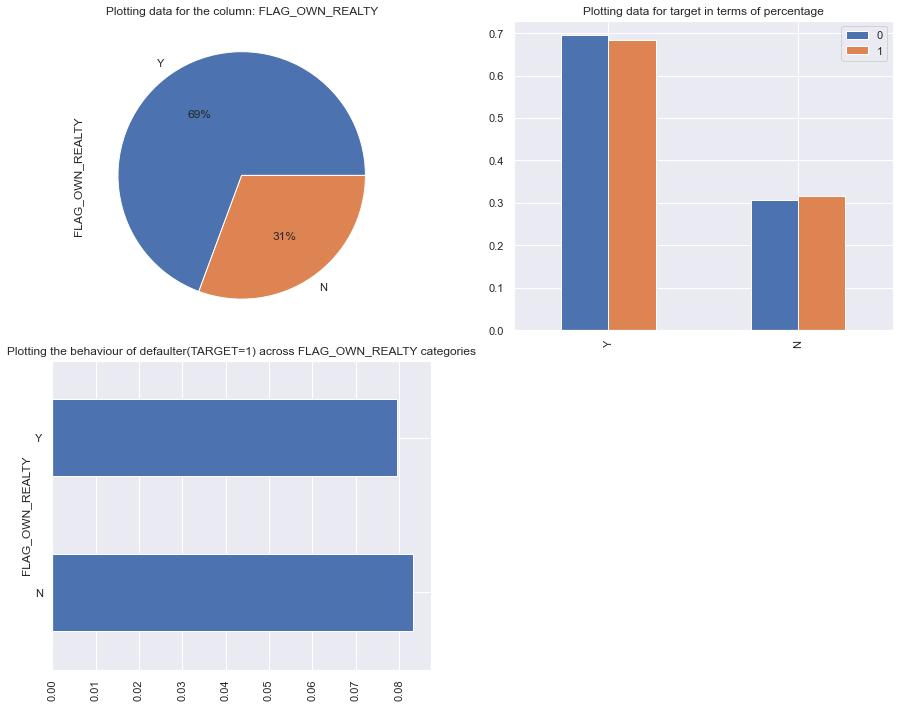

In [53]:
for column in cat_col:
    print("Plotting ", column)
    plotting(application,application_paymentDiff, application_paymentNoDiff, column)

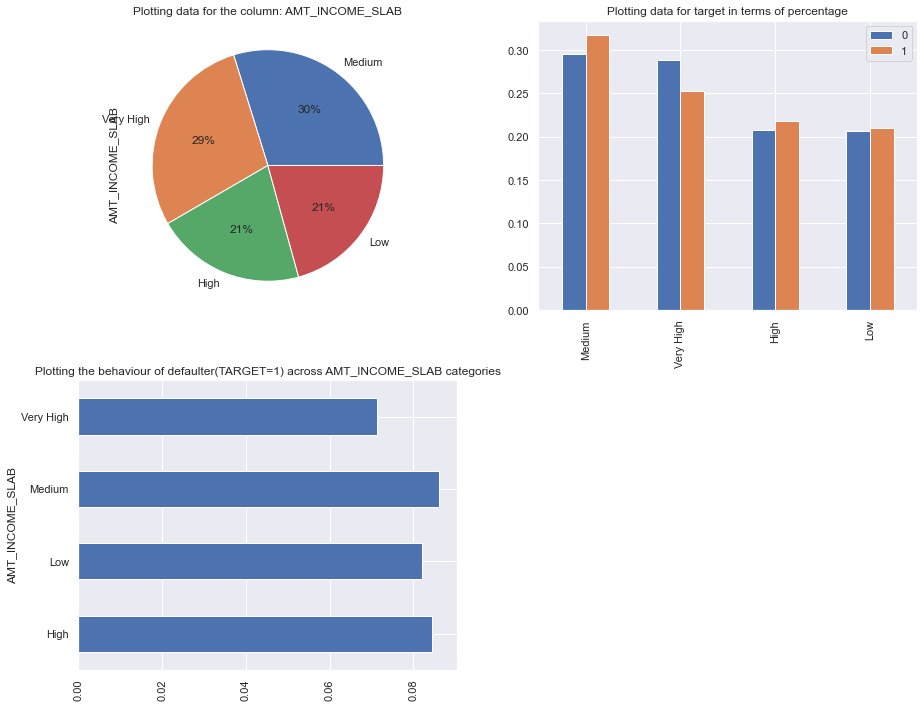

In [54]:
# AMT_INCOME_SLAB is also a new catgorical column. So visulize the effect of income slab on TARGET  
plotting(application,application_paymentDiff, application_paymentNoDiff, 'AMT_INCOME_SLAB')

### Visualize the Effect of Numerical Field

In [55]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

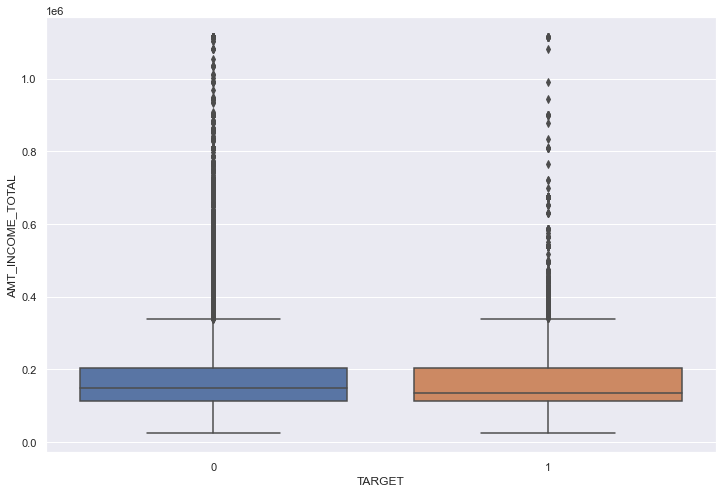

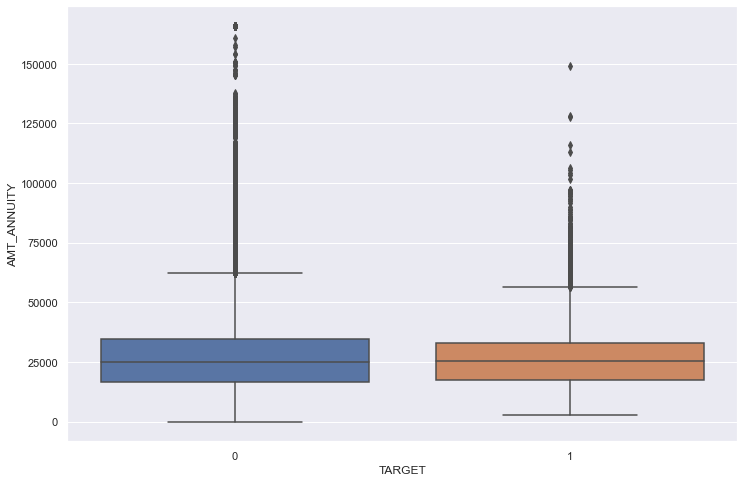

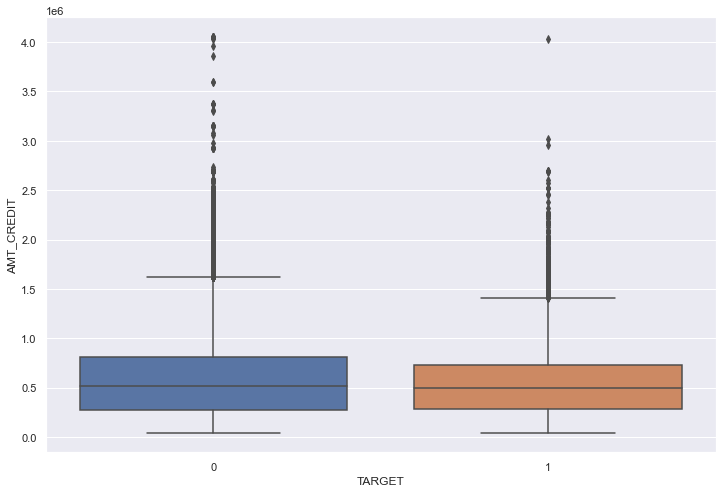

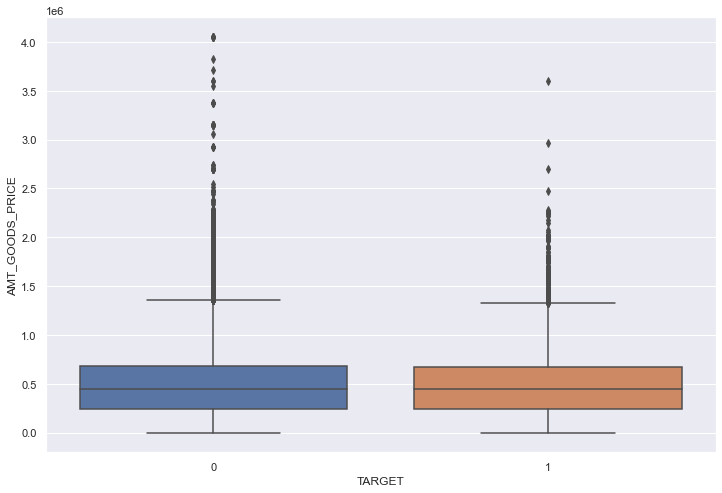

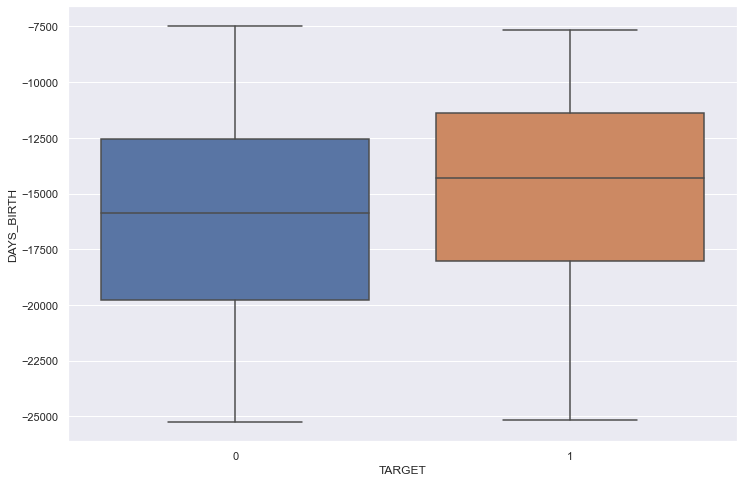

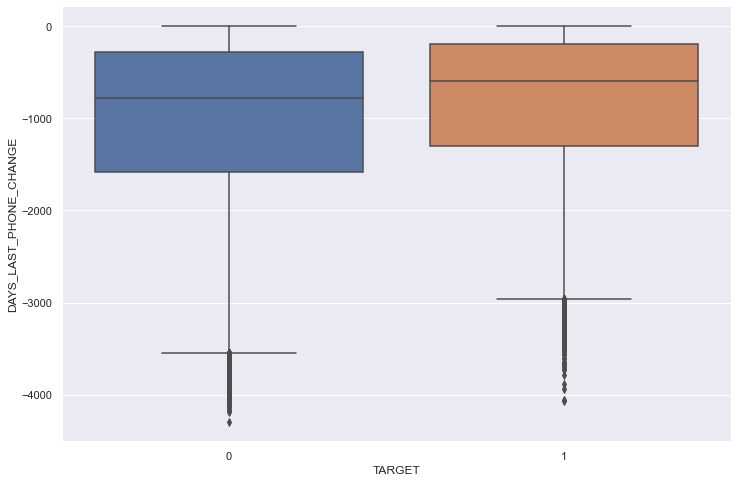

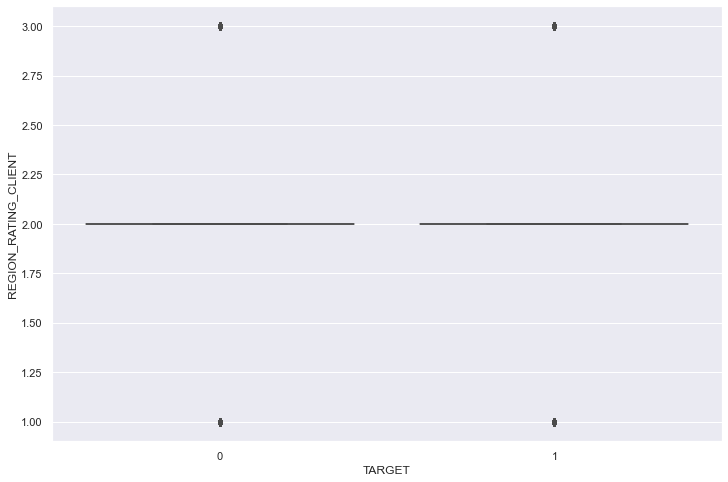

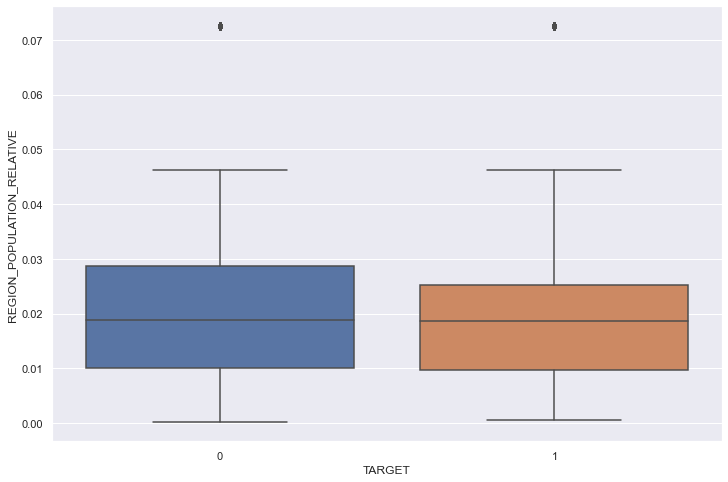

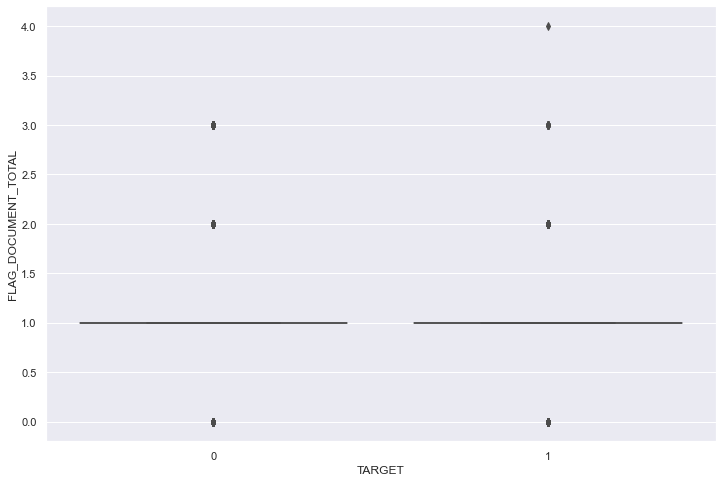

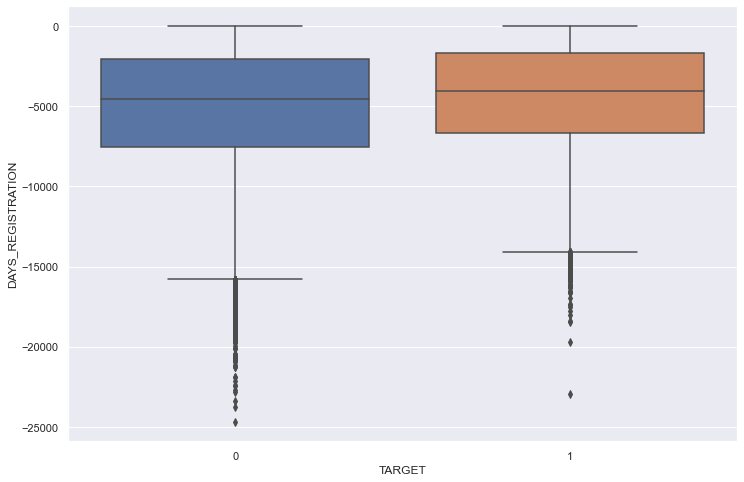

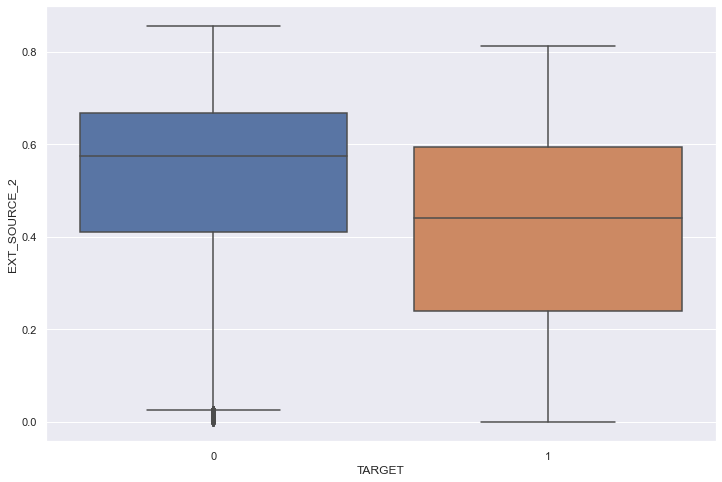

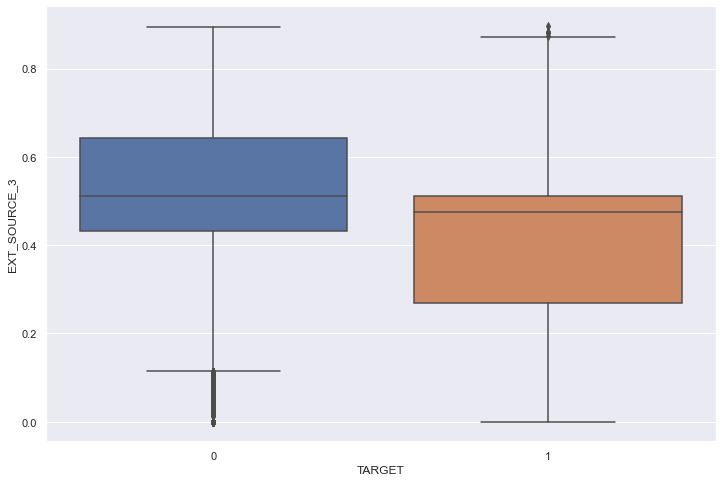

KeyboardInterrupt: 

In [56]:
# Visuslize the effect of Numerical field on TARGET variable
numerical_columns=['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE',
                   'REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE','FLAG_DOCUMENT_TOTAL','DAYS_REGISTRATION',
                   'EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_TO_INCOME_RATIO']

for column in numerical_columns:
    sns.boxplot(data=application,x="TARGET",y=column)
    plt.show()


**`Insights:`** 
- Insight 1: It was observed that applicants who were unemployed or on Long leave like Maternity leave in recent past found it difficult to payback
- Insight 2: Low-skill labors found it more difficult to payback.
- Insight 3: It is observed that male applicants faced more difficulty in paying back
- Insight 4: Applicants with a Lower Secondary level of Education will find it more difficult to payback.
- Insight 5: Applicants who have a Civil Marriage are more susceptible to facing difficulty closely followed by Single/Unmarried applicants.
- Insight 6: Applicant who takes cash loans are more prone to defaulting.
- Insight 7: Applicants who does not own the car found it difficult to payback than applicant who own the car.
- Insight 8: Younger applicants are more prone to defaulting.
- Insight 9: Applicant with less normalized score(EXT_SOURCE_2, EXT_SOURCE_3) are more prone to defaulting.

`Parameters`: NAME_INCOME_TYPE, OCCUPATION_TYPE,  CODE_GENDER, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_CONTRACT_TYPE, FLAG_OWN_CAR, DAYS_BIRTH, EXT_SOURCE_2, EXT_SOURCE_3


## Multivariate Analysis

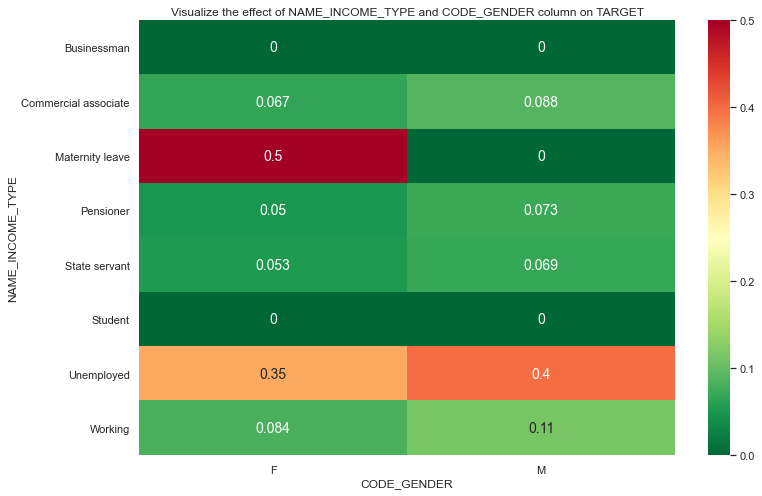

In [57]:
# Visualize the effect of NAME_INCOME_TYPE and CODE_GENDER column on TARGET
res=pd.pivot_table(data=application,index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_INCOME_TYPE and CODE_GENDER column on TARGET')
plt.show()

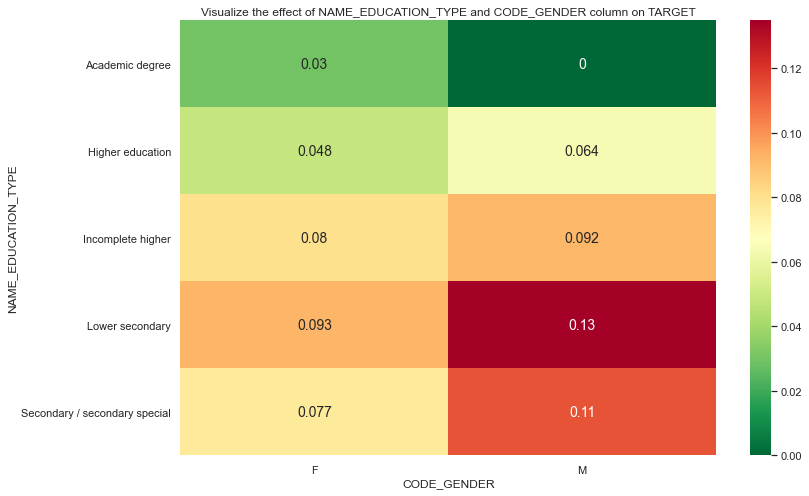

In [58]:
# Visualize the effect of NAME_EDUCATION_TYPE and CODE_GENDER column on TARGET
res=pd.pivot_table(data=application,index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_EDUCATION_TYPE and CODE_GENDER column on TARGET')
plt.show()

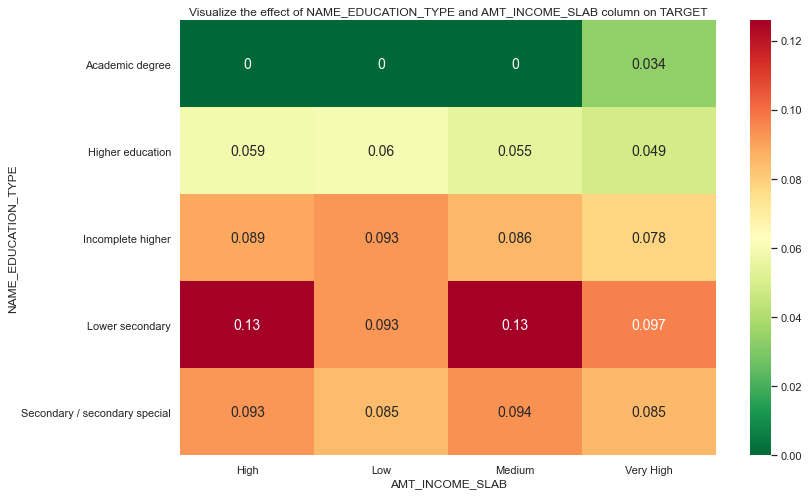

In [59]:
# Visualize the effect of NAME_EDUCATION_TYPE and AMT_INCOME_SLAB column on TARGET
res=pd.pivot_table(data=application,index='NAME_EDUCATION_TYPE',columns='AMT_INCOME_SLAB',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_EDUCATION_TYPE and AMT_INCOME_SLAB column on TARGET')
plt.show()

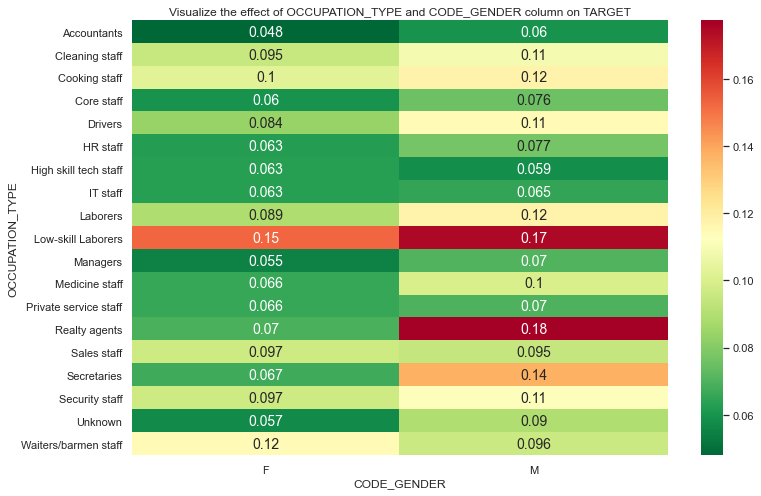

In [60]:
# Visualize the effect of OCCUPATION_TYPE and CODE_GENDER column on TARGET
res=pd.pivot_table(data=application,index='OCCUPATION_TYPE',columns='CODE_GENDER',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of OCCUPATION_TYPE and CODE_GENDER column on TARGET')
plt.show()

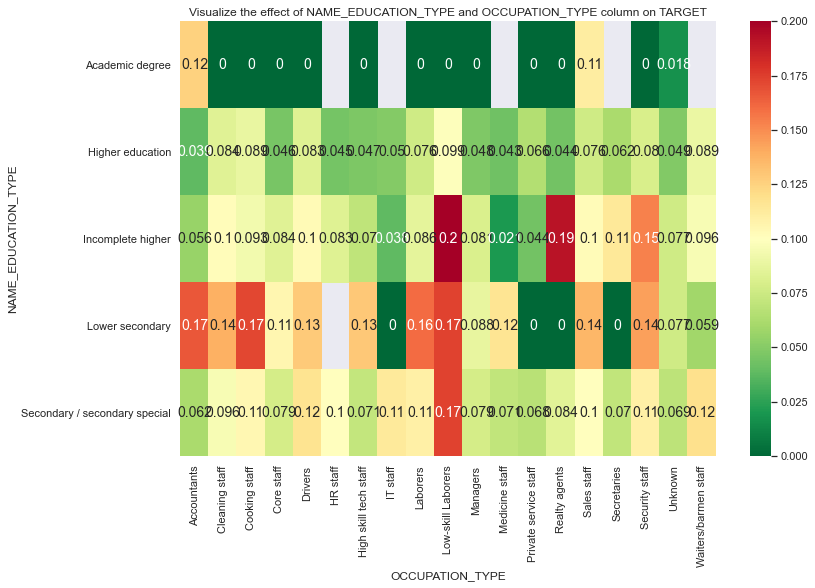

In [62]:
# Visualize the effect of NAME_EDUCATION_TYPE and OCCUPATION_TYPE column on TARGET
res=pd.pivot_table(data=application,index='NAME_EDUCATION_TYPE',columns=['OCCUPATION_TYPE'],values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_EDUCATION_TYPE and OCCUPATION_TYPE column on TARGET')
plt.show()

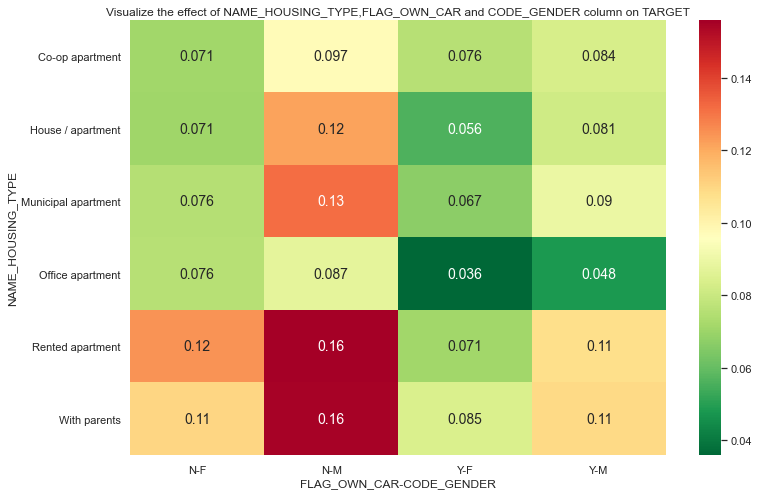

In [63]:
# Visualize the effect of NAME_HOUSING_TYPE,FLAG_OWN_CAR and CODE_GENDER column on TARGET
res=pd.pivot_table(data=application,index='NAME_HOUSING_TYPE',columns=['FLAG_OWN_CAR','CODE_GENDER'],values='TARGET')
sns.heatmap(res,annot=True, cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_HOUSING_TYPE,FLAG_OWN_CAR and CODE_GENDER column on TARGET')
plt.show()

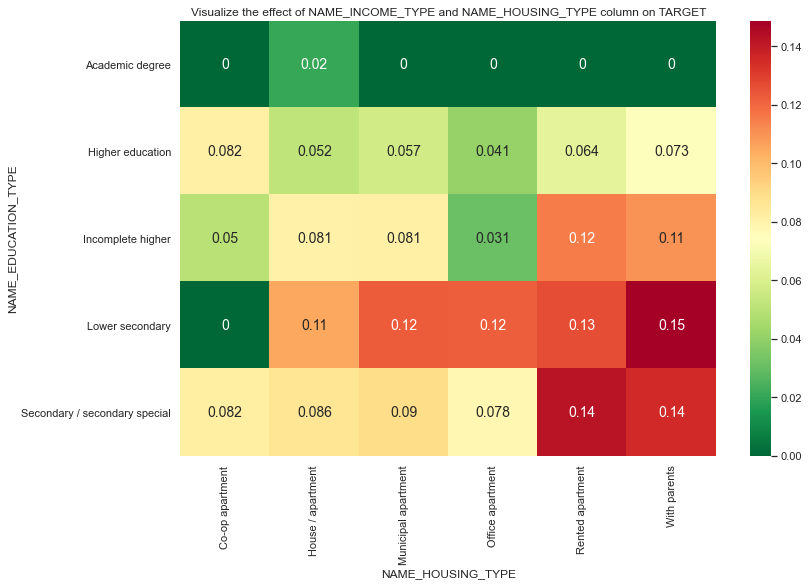

In [64]:
# Visualize the effect of NAME_INCOME_TYPE and NAME_HOUSING_TYPE column on TARGET
res=pd.pivot_table(data=application,index='NAME_EDUCATION_TYPE',columns='NAME_HOUSING_TYPE',values='TARGET')
sns.heatmap(res,annot=True,cmap='RdYlGn_r')
plt.title('Visualize the effect of NAME_INCOME_TYPE and NAME_HOUSING_TYPE column on TARGET')
plt.show()

**`Insights:`** 

- Insight 1: As the degree of Education improves the difficulty faced by the applicant in repaying the loan is likely to reduce, It is advisable to approve loan for better educated applicants. 

- Insight 2: Applicants not possessing their own house, (either living in rented apartments or living with parents) having education upto Secondary level(Lower Secondary / Seconday special) are more vulnerable to default. 
   
- Insight 3: It is evident from the graphs that male applicants are more likely to default regardless of the Education, Income Type and Occupation

- Insight 4: Applicants who are unemployed have displayed a greater chance of defaulting, and this is observed more in case of Males.


## Correlation:

In [65]:
numerical_columns= ['DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
                    'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 
                    'DAYS_BIRTH', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'EXT_SOURCE_2', 'AMT_ANNUITY', 'AMT_CREDIT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR', 'DAYS_REGISTRATION']
application[numerical_columns].corr()

DAYS_LAST_PHONE_CHANGE  REGION_RATING_CLIENT  \
DAYS_LAST_PHONE_CHANGE                     1.000000              0.026022   
REGION_RATING_CLIENT                       0.026022              1.000000   
REGION_POPULATION_RELATIVE                -0.044014             -0.532877   
CNT_FAM_MEMBERS                           -0.027111              0.029797   
AMT_GOODS_PRICE                           -0.076257             -0.103720   
REGION_RATING_CLIENT_W_CITY                0.025717              0.950842   
AMT_INCOME_TOTAL                          -0.053092             -0.214057   
DAYS_EMPLOYED                              0.023032              0.032750   
CNT_CHILDREN                              -0.005802              0.025620   
DAYS_BIRTH                                 0.082940              0.009361   
EXT_SOURCE_3                              -0.067926             -0.011400   
AMT_REQ_CREDIT_BUREAU_MON                 -0.047791             -0.063326   
EXT_SOURCE_2                              -0.195575             -0.292607   
AMT_ANNUITY                               -0.064346             -0.128755   
AMT_CREDIT                                -0.073702             -0.101776   
AMT_REQ_CREDIT_BUREAU_YEAR                -0.116433              0.011233   
DAYS_REGISTRATION                          0.056983              0.080210   

                             REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
DAYS_LAST_PHONE_CHANGE                        -0.044014        -0.027111   
REGION_RATING_CLIENT                          -0.532877         0.029797   
REGION_POPULATION_RELATIVE                     1.000000        -0.024227   
CNT_FAM_MEMBERS                               -0.024227         1.000000   
AMT_GOODS_PRICE                                0.103625         0.061170   
REGION_RATING_CLIENT_W_CITY                   -0.531535         0.030884   
AMT_INCOME_TOTAL                               0.190414         0.036480   
DAYS_EMPLOYED                                 -0.003980        -0.233983   
CNT_CHILDREN                                  -0.025635         0.878700   
DAYS_BIRTH                                    -0.029582         0.279367   
EXT_SOURCE_3                                  -0.005320        -0.025076   
AMT_REQ_CREDIT_BUREAU_MON                      0.071390        -0.003563   
EXT_SOURCE_2                                   0.198703        -0.001840   
AMT_ANNUITY                                    0.118527         0.076004   
AMT_CREDIT                                     0.099738         0.063328   
AMT_REQ_CREDIT_BUREAU_YEAR                    -0.000096        -0.020944   
DAYS_REGISTRATION                             -0.053820         0.173767   

                             AMT_GOODS_PRICE  REGION_RATING_CLIENT_W_CITY  \
DAYS_LAST_PHONE_CHANGE             -0.076257                     0.025717   
REGION_RATING_CLIENT               -0.103720                     0.950842   
REGION_POPULATION_RELATIVE          0.103625                    -0.531535   
CNT_FAM_MEMBERS                     0.061170                     0.030884   
AMT_GOODS_PRICE                     1.000000                    -0.112168   
REGION_RATING_CLIENT_W_CITY        -0.112168                     1.000000   
AMT_INCOME_TOTAL                    0.398419                    -0.230095   
DAYS_EMPLOYED                      -0.064419                     0.034624   
CNT_CHILDREN                       -0.001940                     0.024964   
DAYS_BIRTH                         -0.053943                     0.008073   
EXT_SOURCE_3                        0.043080                    -0.010757   
AMT_REQ_CREDIT_BUREAU_MON           0.059138                    -0.061439   
EXT_SOURCE_2                        0.139094                    -0.288014   
AMT_ANNUITY                         0.777141                    -0.141952   
AMT_CREDIT                          0.986687                    -0.110915   
AMT_REQ_CREDIT_BUREAU_YEAR         -0.038

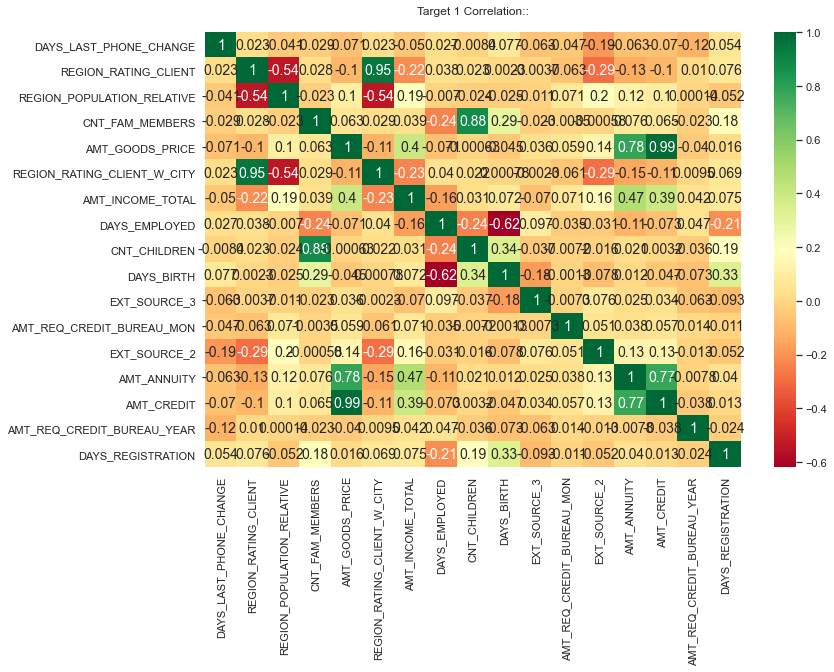

In [66]:
# For Target 1
target1 = application_paymentDiff[numerical_columns].corr()
sns.heatmap(target1, annot=True,cmap='RdYlGn')
plt.title("Target 1 Correlation::\n")
plt.show()


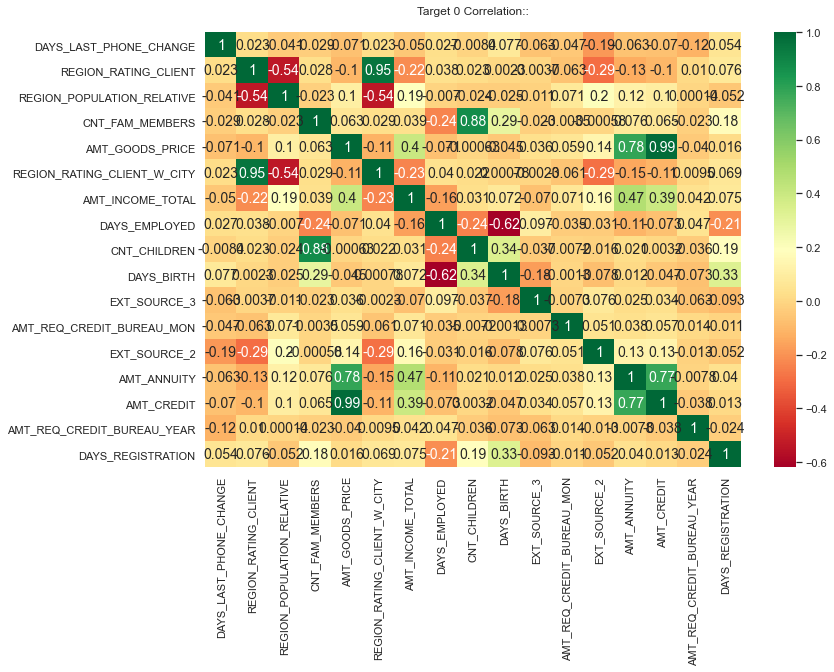

In [67]:
# For Target 0
target0 = application_paymentDiff[numerical_columns].corr()
sns.heatmap(target0, annot=True,cmap='RdYlGn')
plt.title("Target 0 Correlation::\n")
plt.show()


**`Insights:`** 

Top Correlated Attributes:

- AMT_GOOD_PRICE and AMT_CREDIT

- AMT_ANNUITY and AMT_GOOD_PRICE

- AMT_ANNUITY and AMT_CREDIT

- REGION_RAITNG_CLIENT and REGION_RATING_CLIENT_W_CITY

Negatively correlatted Attributes :

- REGION_POPULATION_RELATIVE and REGION_RATING_CLIENT.

- AMT_INCOME_TOTAL and EXT_SOURCE_3

- AMT_CREDIT and EXT_SOURCE_3



# File 2.  Previous Application Dataset

## Step 1: Data Preparation 
### 1.1 Data Loading

In [70]:
# Read 'previous_application.csv' file
prev_application =pd.read_csv('previous_application.csv')
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### 1.2 Data Inspection

In [71]:
# Display information
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [72]:
# Display the shape
prev_application.shape

(1670214, 37)

In [73]:
prev_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [74]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Let’s view the unique values of each column to help us understand the dataset better.

In [75]:
for col in prev_application:
    print("{} : {}  \n".format(col,prev_application[col].unique()))

SK_ID_PREV : [2030495 2802425 2523466 ... 2659632 2785582 2418762]  

SK_ID_CURR : [271877 108129 122040 ... 253940 353284 191629]  

NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']  

AMT_ANNUITY : [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]  

AMT_APPLICATION : [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]  

AMT_CREDIT : [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]  

AMT_DOWN_PAYMENT : [    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]  

AMT_GOODS_PRICE : [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]  

WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']  

HOUR_APPR_PROCESS_START : [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]  

FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N']  

NFLAG_LAST_APPL_IN_DAY : [1 0]  

RATE_DOWN_PAYMENT : [0.                nan 0.10397129 ... 0.10340195 0.04430024 

In [76]:
# Check the NA values
prev_application.isna().sum().sort_values(ascending=False).head(50)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
RATE_DOWN_PAYMENT               895844
AMT_DOWN_PAYMENT                895844
NAME_TYPE_SUITE                 820405
DAYS_TERMINATION                673065
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_FIRST_DRAWING              673065
DAYS_FIRST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_LAST_DUE                   673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

### 1.3 Data Cleaning

In [77]:
# The columns where the number of missing values is > 50 % can be ignored/deleted.
# We will retain the rest columns.
prev_valid_columns=list(prev_application.columns[prev_application.isna().sum()< (len(prev_application)/2)])

# Update the application dataframe to contain only the columns with sufficient data.
prev_application = prev_application[prev_valid_columns]

In [78]:
print (prev_application.shape)

(1670214, 33)


In [79]:
# Get the percentage of Nulls in each columns before we start the cleaning process
prev_application_missing = (1 - prev_application.count() / len(prev_application))*100
prev_application_missing.sort_values(ascending=False).head(16)

NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DUE               40.298129
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_CASH_LOAN_PURPOSE        0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_APPLICATION               0.000000
dtype: float64

In [80]:
# Approximately 50% of the data is missing for these columns, thus we will have to drop them.
prev_application=prev_application.drop(['NAME_TYPE_SUITE','DAYS_FIRST_DUE','DAYS_TERMINATION','DAYS_FIRST_DRAWING',
                              'NFLAG_INSURED_ON_APPROVAL','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE' ], axis=1)

In [81]:
# Get the percentage of Nulls in each columns after droping the few columns
prev_application_missing = (1 - prev_application.count() / len(prev_application))*100
prev_application_missing.sort_values(ascending=False).head(16)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_YIELD_GROUP                0.000000
DAYS_DECISION                   0.000000
dtype: float64

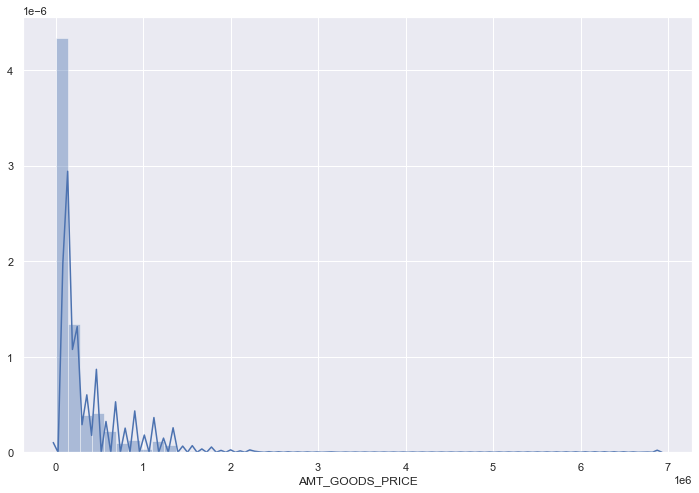

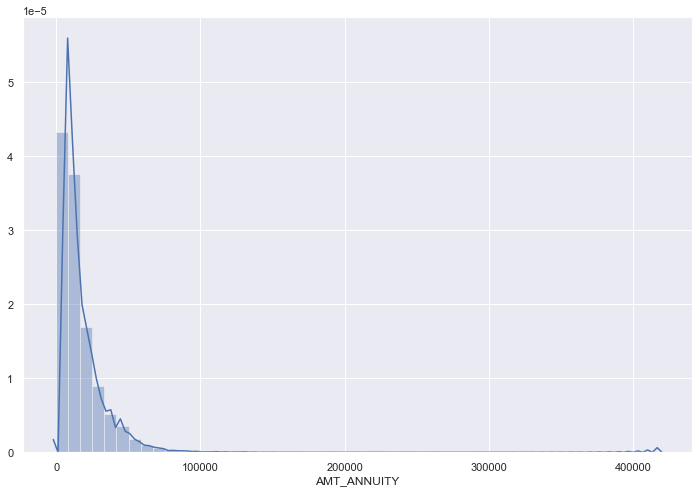

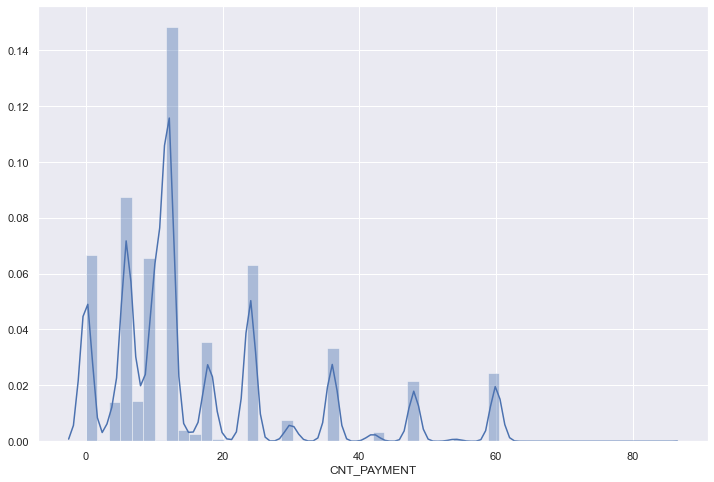

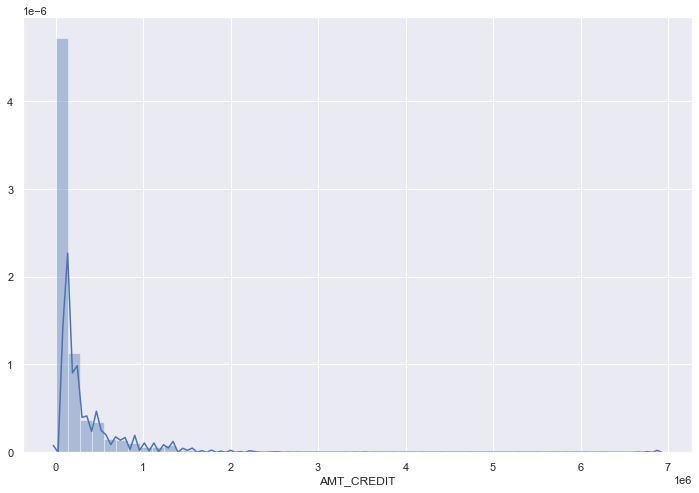

In [82]:
for column in ['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT',
               'AMT_CREDIT']:
    plot_frequency(prev_application,column)

In [83]:
# As PRODUCT_COMBINATION is categorical field so imputing it with mode.
# All the above mentioned field have a skewed distribution thus filling missing values with Median


prev_application['PRODUCT_COMBINATION'].fillna(prev_application.PRODUCT_COMBINATION.mode()[0],inplace=True)

prev_application['AMT_GOODS_PRICE'].fillna(prev_application.AMT_GOODS_PRICE.median(),inplace=True)
prev_application['AMT_ANNUITY'].fillna(prev_application.AMT_ANNUITY.median(),inplace=True)
prev_application['CNT_PAYMENT'].fillna(prev_application.CNT_PAYMENT.median(),inplace=True)
prev_application['AMT_CREDIT'].fillna(prev_application.AMT_CREDIT.median(),inplace=True)


In [84]:
# Get the percentage of Nulls in each columns after droping the few columns
prev_application_missing = (1 - prev_application.count() / len(prev_application))*100
prev_application_missing.sort_values(ascending=False).head(16)

PRODUCT_COMBINATION            0.0
NAME_YIELD_GROUP               0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
dtype: float64

In [85]:
prev_application.shape

(1670214, 26)

In [86]:
len(prev_application.SK_ID_PREV.unique())

1670214

In [87]:
len(prev_application.SK_ID_CURR.unique())

338857

As we can see above, shape of previous application is (1670214, 26) and length of SK_ID_PREV is also (1670214) but the length of SK_ID_CURR is (338857), which is less than length of  SK_ID_PREV, which tells  us that there are duplicate number of SK_ID_PREV

In [88]:
prev_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [89]:
previous_trail=application.merge(prev_application,left_on='SK_ID_CURR',right_on='SK_ID_CURR',
                                how='inner',suffixes=('_current', '_previous'))

In [90]:
previous_trail.shape

(1413701, 81)

In [91]:
previous_trail.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_current CODE_GENDER FLAG_OWN_CAR  \
0      100002       1                 Cash loans           M            N   
1      100003       0                 Cash loans           F            N   
2      100003       0                 Cash loans           F            N   
3      100003       0                 Cash loans           F            N   
4      100004       0            Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_current  \
0               Y           0.0          202500.0            406597.5   
1               N           0.0          270000.0           1293502.5   
2               N           0.0          270000.0           1293502.5   
3               N           0.0          270000.0           1293502.5   
4               Y           0.0           67500.0            135000.0   

   AMT_ANNUITY_current  AMT_GOODS_PRICE_current NAME_TYPE_SUITE  \
0              24700.5                 351000.0   Unaccompanied   
1              35698.5                1129500.0          Family   
2              35698.5                1129500.0          Family   
3              35698.5                1129500.0          Family   
4               6750.0                 135000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.003541      -16765          -1188   
3  House / apartment                    0.003541      -16765          -1188   
4  House / apartment                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0            -3648.0            -2120           1               1   
1            -1186.0             -291           1               1   
2            -1186.0             -291           1               1   
3            -1186.0             -291           1               1   
4            -4260.0            -2531           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                0                 1           1           0      Core staff   
3                0                 1           1           0      Core staff   
4                1                 1           1           0        Laborers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     1                            1   
3              2.0                     1                            1   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START_current  HOUR_APPR_PROCESS_START_current  \
0                          WEDNESDAY                               10   
1                             MONDAY                               11   
2                             MONDAY                               11   
3                             MONDAY                               11   
4                             MONDAY                                9   

In [92]:
previous_trail.isna().sum()

SK_ID_CURR                             0
TARGET                                 0
NAME_CONTRACT_TYPE_current             0
CODE_GENDER                            0
FLAG_OWN_CAR                           0
FLAG_OWN_REALTY                        0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT_current                     0
AMT_ANNUITY_current                    0
AMT_GOODS_PRICE_current                0
NAME_TYPE_SUITE                        0
NAME_INCOME_TYPE                       0
NAME_EDUCATION_TYPE                    0
NAME_FAMILY_STATUS                     0
NAME_HOUSING_TYPE                      0
REGION_POPULATION_RELATIVE             0
DAYS_BIRTH                             0
DAYS_EMPLOYED                          0
DAYS_REGISTRATION                      0
DAYS_ID_PUBLISH                        0
FLAG_MOBIL                             0
FLAG_EMP_PHONE                         0
FLAG_WORK_PHONE                        0
FLAG_CONT_MOBILE

In [93]:
# Find the outlier
hasVarOutliers(previous_trail)

AMT_INCOME_TOTAL ----HAS OUTLIERS
AMT_ANNUITY_current ----HAS OUTLIERS
AMT_GOODS_PRICE_current ----HAS OUTLIERS
CREDIT_TO_INCOME_RATIO ----HAS OUTLIERS
AMT_ANNUITY_previous ----HAS OUTLIERS
AMT_APPLICATION ----HAS OUTLIERS
AMT_CREDIT_previous ----HAS OUTLIERS
AMT_GOODS_PRICE_previous ----HAS OUTLIERS
SELLERPLACE_AREA ----HAS OUTLIERS


In [94]:
# Fix the Outlier
previous_trail[['AMT_INCOME_TOTAL','AMT_ANNUITY_current','AMT_GOODS_PRICE_current','AMT_ANNUITY_previous','AMT_APPLICATION',
                 'AMT_CREDIT_previous','AMT_GOODS_PRICE_previous','SELLERPLACE_AREA']]=fillOutliers(
    previous_trail[['AMT_INCOME_TOTAL','AMT_ANNUITY_current','AMT_GOODS_PRICE_current','AMT_ANNUITY_previous','AMT_APPLICATION',
                 'AMT_CREDIT_previous','AMT_GOODS_PRICE_previous','SELLERPLACE_AREA']])

AMT_INCOME_TOTAL Differences Between Max and Upper: 63000.0 upper: 1050750.0
AMT_ANNUITY_current Differences Between Max and Upper: 2238.75 upper: 163516.5
AMT_GOODS_PRICE_current Differences Between Max and Upper: 56250.0 upper: 3993750.0
AMT_ANNUITY_previous Differences Between Max and Upper: 257431.20750000002 upper: 160626.9375
AMT_APPLICATION Differences Between Max and Upper: 2475000.0 upper: 3375000.0
AMT_CREDIT_previous Differences Between Max and Upper: 721149.75 upper: 3788538.75
AMT_GOODS_PRICE_previous Differences Between Max and Upper: 2499158.25 upper: 3350841.75
SELLERPLACE_AREA Differences Between Max and Upper: 3991073.5 upper: 8926.5


In [96]:
previous_trail.head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_current CODE_GENDER FLAG_OWN_CAR  \
0       100002       1                 Cash loans           M            N   
1       100003       0                 Cash loans           F            N   
2       100003       0                 Cash loans           F            N   
3       100003       0                 Cash loans           F            N   
4       100004       0            Revolving loans           M            Y   
5       100006       0                 Cash loans           F            N   
6       100006       0                 Cash loans           F            N   
7       100006       0                 Cash loans           F            N   
8       100006       0                 Cash loans           F            N   
9       100006       0                 Cash loans           F            N   
10      100006       0                 Cash loans           F            N   
11      100006       0                 Cash loans           F            N   
12      100006       0                 Cash loans           F            N   
13      100006       0                 Cash loans           F            N   
14      100007       0                 Cash loans           M            N   
15      100007       0                 Cash loans           M            N   
16      100007       0                 Cash loans           M            N   
17      100007       0                 Cash loans           M            N   
18      100007       0                 Cash loans           M            N   
19      100007       0                 Cash loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_current  \
0                Y           0.0          202500.0            406597.5   
1                N           0.0          270000.0           1293502.5   
2                N           0.0          270000.0           1293502.5   
3                N           0.0          270000.0           1293502.5   
4                Y           0.0           67500.0            135000.0   
5                Y           0.0          135000.0            312682.5   
6                Y           0.0          135000.0            312682.5   
7                Y           0.0          135000.0            312682.5   
8                Y           0.0          135000.0            312682.5   
9                Y           0.0          135000.0            312682.5   
10               Y           0.0          135000.0            312682.5   
11               Y           0.0          135000.0            312682.5   
12               Y           0.0          135000.0            312682.5   
13               Y           0.0          135000.0            312682.5   
14               Y           0.0          121500.0            513000.0   
15               Y           0.0          121500.0            513000.0   
16               Y           0.0          121500.0            513000.0   
17               Y           0.0          121500.0            513000.0   
18               Y           0.0          121500.0            513000.0   
19               Y           0.0          121500.0            513000.0   

    AMT_ANNUITY_current  AMT_GOODS_PRICE_current NAME_TYPE_SUITE  \
0               24700.5                 351000.0   Unaccompanied   
1               35698.5                1129500.0          Family   
2               35698.5                1129500.0          Family   
3               35698.5                1129500.0          Family   
4                6750.0                 135000.0   Unaccompanied   
5               29686.5                 297000.0   Unaccompanied   
6               29686.5                 297000.0   Unaccompanied   
7               29686.5                 297000.0   Unaccompanied   
8               29686.5                 297000.0   Unaccompanied   
9               29686.5                 297000.0   Unaccompanied   
10              29686.5                 297000.0   Unaccompani

In [97]:
previous_trail_paymentDiff=previous_trail[previous_trail.TARGET==1]
previous_trail_paymentNotDiff=previous_trail[previous_trail.TARGET==0]

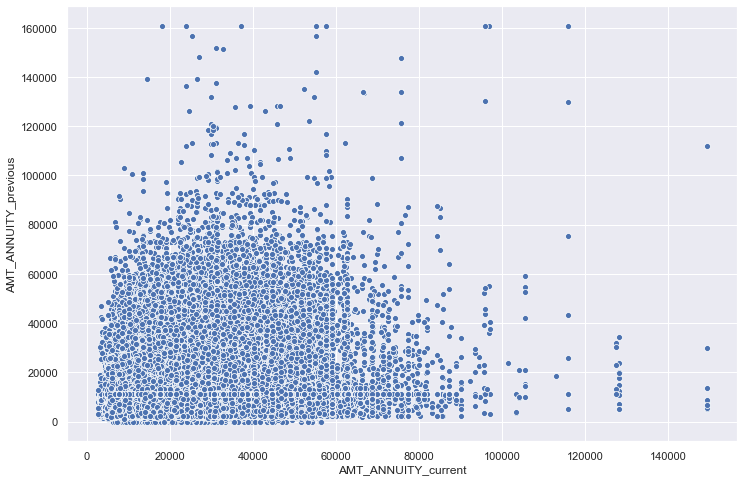

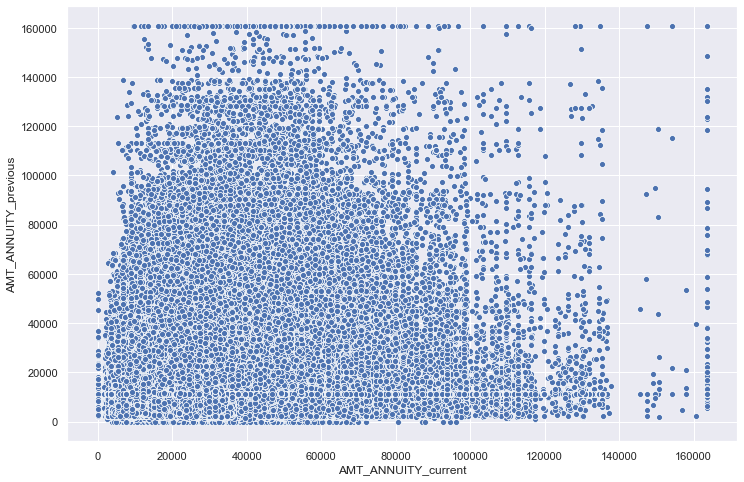

In [98]:
sns.scatterplot(x=previous_trail_paymentDiff.AMT_ANNUITY_current,y=previous_trail_paymentDiff.AMT_ANNUITY_previous)
plt.show()
sns.scatterplot(x=previous_trail_paymentNotDiff.AMT_ANNUITY_current,y=previous_trail_paymentNotDiff.AMT_ANNUITY_previous)
plt.show()

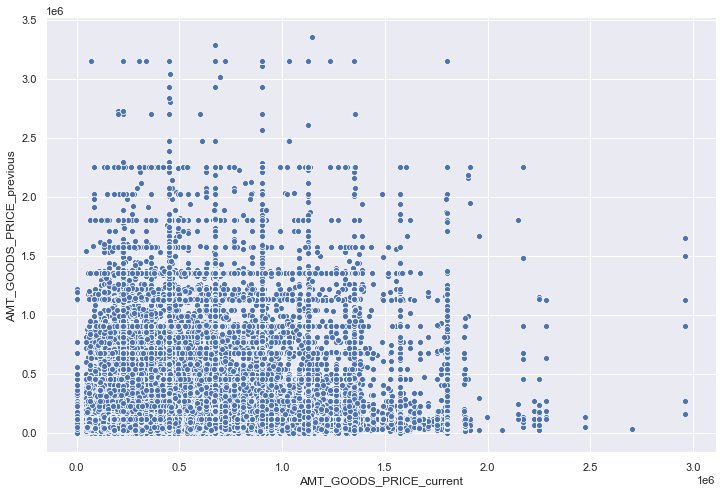

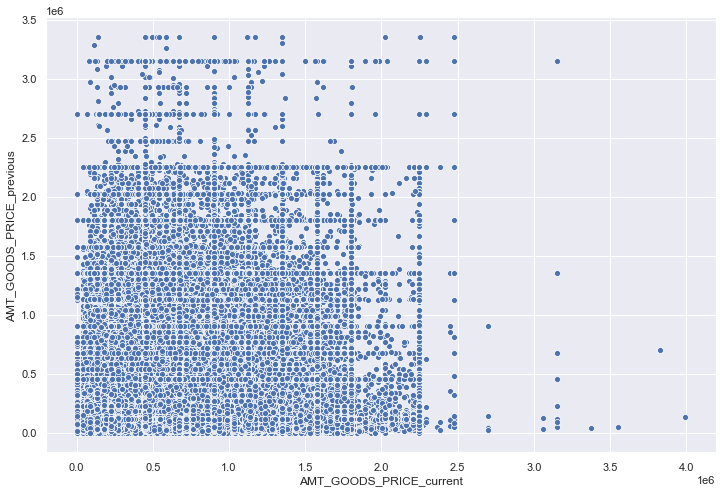

In [99]:
sns.scatterplot(x=previous_trail_paymentDiff.AMT_GOODS_PRICE_current,y=previous_trail_paymentDiff.AMT_GOODS_PRICE_previous)
plt.show()
sns.scatterplot(x=previous_trail_paymentNotDiff.AMT_GOODS_PRICE_current,y=previous_trail_paymentNotDiff.AMT_GOODS_PRICE_previous)
plt.show()

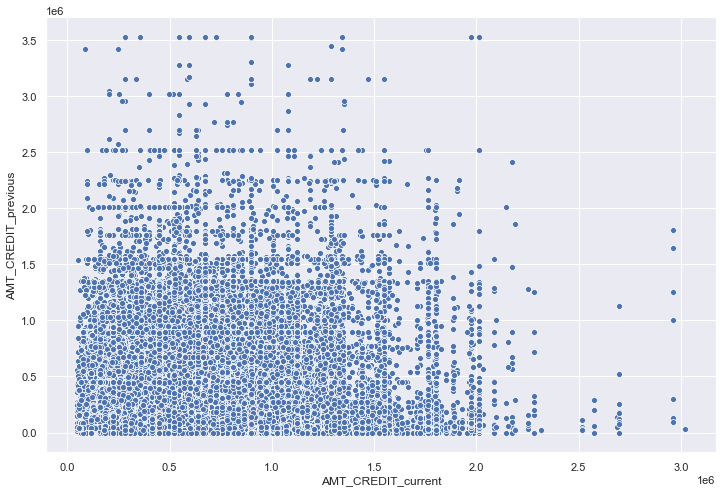

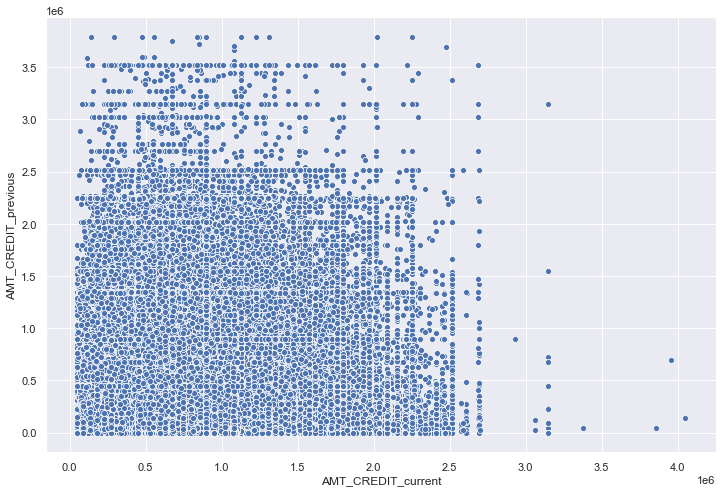

In [100]:
sns.scatterplot(x=previous_trail_paymentDiff.AMT_CREDIT_current,y=previous_trail_paymentDiff.AMT_CREDIT_previous)
plt.show()
sns.scatterplot(x=previous_trail_paymentNotDiff.AMT_CREDIT_current,y=previous_trail_paymentNotDiff.AMT_CREDIT_previous)
plt.show()

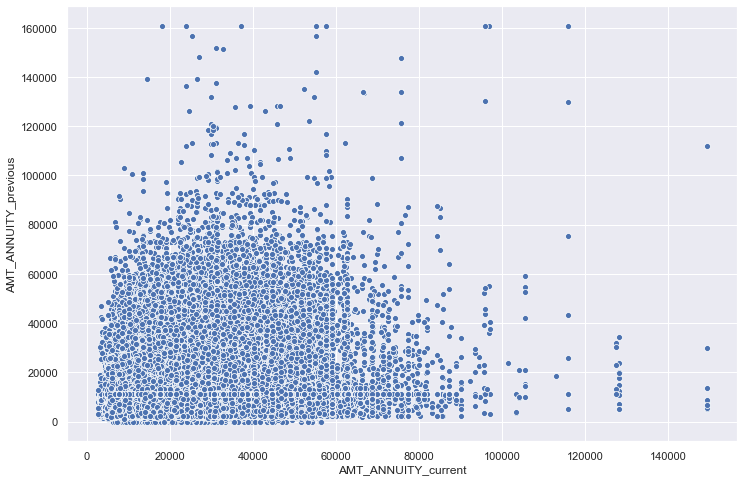

In [ ]:
sns.scatterplot(x=previous_trail_paymentDiff.AMT_ANNUITY_current,y=previous_trail_paymentDiff.AMT_ANNUITY_previous)
plt.show()
sns.scatterplot(x=previous_trail_paymentNotDiff.AMT_ANNUITY_current,y=previous_trail_paymentNotDiff.AMT_ANNUITY_previous)
plt.show()